<h1 style="color:darkblue; font-size:28px;">Multiple Linear Regression - Bike Sharing Assignment</h1>

<h3 style="color:maroon;">Problem Statement</h3>
<p style="font-size:16px; line-height:1.5;">
A bike-sharing system is a service where bikes are made available for shared use on a short-term basis, either for a fee or for free. Many bike-sharing systems allow users to borrow a bike from a "dock," which is typically computer-controlled. The user enters payment information, and the system unlocks the bike, which can be returned to another dock within the same system.
</p>
<p style="font-size:16px; line-height:1.5;">
A US bike-sharing provider, <b>BoomBikes</b>, has recently suffered considerable dips in revenue due to the ongoing Corona pandemic. The company is finding it difficult to sustain operations in the current market scenario. To overcome this challenge, they have decided to develop a thoughtful business plan to accelerate revenue once the lockdown ends and the economy recovers.
</p>
<p style="font-size:16px; line-height:1.5;">
In this endeavor, BoomBikes aims to understand the demand for shared bikes among people after the national quarantine due to Covid-19 ends. They plan to use these insights to prepare themselves to cater to the public's needs once the situation improves, differentiate from competitors, and generate significant profits.
</p>
<p style="font-size:16px; line-height:1.5;">
Based on meteorological surveys and people's habits, the service provider has gathered a large dataset on daily bike demand across the American market, capturing various influencing factors.
</p>

<h3 style="color:maroon;">The Company Wants to Know:</h3>
<ul style="font-size:16px; line-height:1.5;">
    <li>Which variables are significant in predicting the demand for shared bikes.</li>
    <li>How well those variables describe the bike demand.</li>
</ul>

<h3 style="color:maroon;">Business Goal:</h3>
<p style="font-size:16px; line-height:1.5;">
<b>Develop a model</b> to identify the significant variables that influence the demand for shared bikes using the available independent variables.<br>
This model will help the management team adjust their business strategy to meet demand levels and fulfill customer expectations.
</p>

In [3]:
# Import Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

# Import Scikit-Learn Libraries for Model Training and Evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Feature Selection and Model Building
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Statistical Analysis
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Model Evaluation
from sklearn.metrics import r2_score

## Data Dictionary - Dataset Characteristics

The `day.csv` file contains the following fields:

- **instant**: Record index
- **dteday**: Date
- **season**: Season
  - 1: Spring
  - 2: Summer
  - 3: Fall
  - 4: Winter
- **yr**: Year
  - 0: 2018
  - 1: 2019
- **mnth**: Month (1 to 12)
- **holiday**: Whether the day is a holiday or not (extracted from [DC Government Holiday Schedule](http://dchr.dc.gov/page/holiday-schedule))
- **weekday**: Day of the week
- **workingday**: 1 if the day is neither a weekend nor a holiday, otherwise 0
- **weathersit**: Weather situation
  - 1: Clear, Few clouds, Partly cloudy
  - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  - 4: Heavy Rain + Ice Pellets + Thunderstorm + Mist, Snow + Fog
- **temp**: Temperature in Celsius
- **atemp**: Feeling temperature in Celsius
- **hum**: Humidity
- **windspeed**: Wind speed
- **casual**: Count of casual users
- **registered**: Count of registered users
- **cnt**: Count of total rental bikes, including both casual and registered users

## 1. Data Reading & Understanding

In [6]:
# Loading the loan data and converting into dataframe

df = pd.read_csv("day.csv")

In [7]:
# Display top 5 rows of a dataframe to check how data looks like

df.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [8]:
# Display last 5 rows of a dataframe to check how data looks like

df.tail()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
725      726  27-12-2019       1   1    12        0        4           1   
726      727  28-12-2019       1   1    12        0        5           1   
727      728  29-12-2019       1   1    12        0        6           0   
728      729  30-12-2019       1   1    12        0        0           0   
729      730  31-12-2019       1   1    12        0        1           1   

     weathersit       temp     atemp      hum  windspeed  casual  registered  \
725           2  10.420847  11.33210  65.2917  23.458911     247        1867   
726           2  10.386653  12.75230  59.0000  10.416557     644        2451   
727           2  10.386653  12.12000  75.2917   8.333661     159        1182   
728           1  10.489153  11.58500  48.3333  23.500518     364        1432   
729           2   8.849153  11.17435  57.7500  10.374682     439        2290   

      cnt  
725  2114  
726  3095  
727  1341  
728  1796  
729  2729

#### Therefore we can confirm that there are no headers and footers in the given dataset

In [10]:
# Verify the Shape of the dataframe

df.shape

(730, 16)

#### There are `730 rows` and `16 columns` in the dataset

#### There are no null values in entire dataset

In [13]:
# Check the dataset for null values from each column in the dataframe

(df.isnull().sum())/(len(df))

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [14]:
print("Total columns with values NA: ", len(df.columns[df.isna().all()].tolist()))

Total columns with values NA:  0


In [15]:
# Check the dtypes of all columns

df.dtypes

# Observation: Except dteday, all are numerical columns.

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [16]:
# Verify other statistical data of each numerical column

df.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

## Identifying Irrelevant Columns for Analysis

1. From the initial analysis, we observe that the column **`instant`** is unique for each record and acts as an identifier. Since it does not contribute to the analysis, we can drop this column.

2. The **`dteday`** column is of object type and represents the date. However, since we already have separate columns for **year** (`yr`) and **month** (`mnth`), the `dteday` column is redundant and can also be removed.

By dropping these columns, we simplify the dataset and retain only the relevant attributes for analysis.

In [18]:
 #Lets delete all the columns which value is uniqe in nature.

unique_columns = [col for col in df.columns if df[col].nunique() == len(df)]
unique_columns

['instant', 'dteday']

In [19]:
# Dropping the 'instant' and 'dteday' columns from the dataset

dropped_columns = ['instant','dteday']
df.drop(dropped_columns,axis=1,inplace=True)

In [20]:
# Verify the shape again, after dropping columns

df.shape

# Observation: Column count successfully dropped from 16 to 14

(730, 14)

In [21]:
# Checking  if there any duplicates row.

duplicate_rows = len(df[df.duplicated()])
print("Count of duplicate rows:",round(duplicate_rows, 2))

# Observation: No douplicate rows found in entire dataframe.

Count of duplicate rows: 0


In [22]:
# We can Observe that "Season", "Weathersit" and "mnth" columns looks to be Categorical data. But the datatype provided is "int"
# Hence convert them into Categorical columns

df['season']=df['season'].astype('category')
df['weathersit']=df['weathersit'].astype('category')
df['mnth']=df['mnth'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    int64   
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  casual      730 non-null    int64   
 12  registered  730 non-null    int64   
 13  cnt         730 non-null    int64   
dtypes: category(3), float64(4), int64(7)
memory usage: 65.7 KB


## Data Transformation Based on Data Dictionary

Based on the data dictionary, we can interpret and transform the following columns for clarity and consistency in analysis:

1. **`season`**: Represents the season as an integer:
   - 1: Spring
   - 2: Summer
   - 3: Fall
   - 4: Winter

2. **`yr`**: Indicates the year:
   - 0: 2018
   - 1: 2019
   
   This column is already in the correct format.

3. **`mnth`**: Represents the month (1 to 12 for January to December).

4. **`holiday`**: Indicates whether the day is a holiday (0 or 1). No transformation is needed as it is already in the correct format.

5. **`weekday`**: Represents the day of the week (0 to 6 for Sunday to Saturday).

6. **`workingday`**: Indicates if the day is a working day (1 if it’s neither a weekend nor a holiday, otherwise 0). This column is already correctly formatted.

7. **`weathersit`**: Indicates the weather situation, categorized as follows:
   - 1: Good
   - 2: Moderate
   - 3: Bad
   - 4: Severe

   We can map these categories to the labels `['good', 'moderate', 'bad', 'Severe']` for readability.

By transforming these columns based on the data dictionary, we enhance the interpretability of the dataset for analysis.

In [24]:
df.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)
df.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

df.mnth = df.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

df.weekday = df.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})

In [25]:
# Verify the top 5 rows in the data set again to check if changes are being reflected

df.head()

season  yr mnth  holiday weekday  workingday weathersit       temp  \
0  spring   0  jan        0     sat           0   moderate  14.110847   
1  spring   0  jan        0     sun           0   moderate  14.902598   
2  spring   0  jan        0     mon           1       good   8.050924   
3  spring   0  jan        0     tue           1       good   8.200000   
4  spring   0  jan        0     wed           1       good   9.305237   

      atemp      hum  windspeed  casual  registered   cnt  
0  18.18125  80.5833  10.749882     331         654   985  
1  17.68695  69.6087  16.652113     131         670   801  
2   9.47025  43.7273  16.636703     120        1229  1349  
3  10.60610  59.0435  10.739832     108        1454  1562  
4  11.46350  43.6957  12.522300      82        1518  1600

## 2. Perform Exploratory Data Analysis

### Univariate Analysis

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    object  
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  casual      730 non-null    int64   
 12  registered  730 non-null    int64   
 13  cnt         730 non-null    int64   
dtypes: category(3), float64(4), int64(6), object(1)
memory usage: 65.7+ KB


In [29]:
# Get a list of numeric columns

numeric_columns = df.select_dtypes(include=['number']).columns.tolist()
print(numeric_columns)

['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']


In [30]:
num_features_to_plot = ['temp', 'atemp', 'hum', 'windspeed']
num_counts_to_plot = ['casual', 'registered', 'cnt']

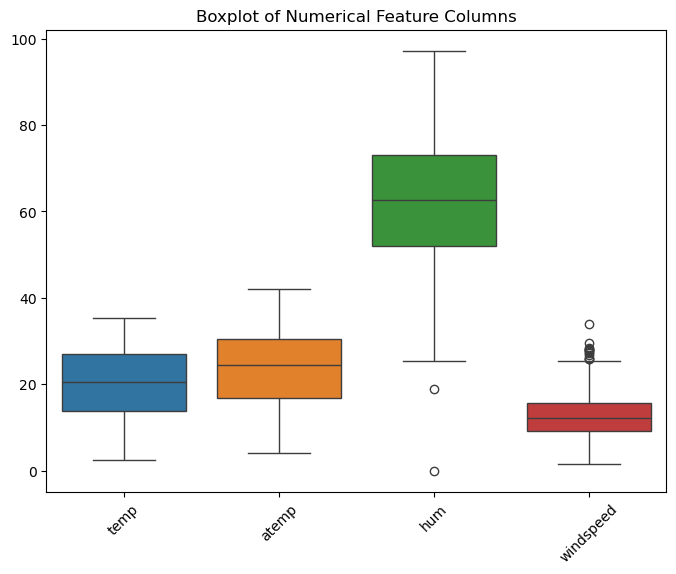

In [31]:
# Setting the plot size for better visibility
plt.figure(figsize=(8, 6))

# Creating a boxplot for each numerical feature column using the list
sns.boxplot(data=df[num_features_to_plot]) # ['temp', 'atemp', 'hum', 'windspeed']

# Adding title and labels
plt.title('Boxplot of Numerical Feature Columns')
plt.xticks(rotation=45)
plt.show()

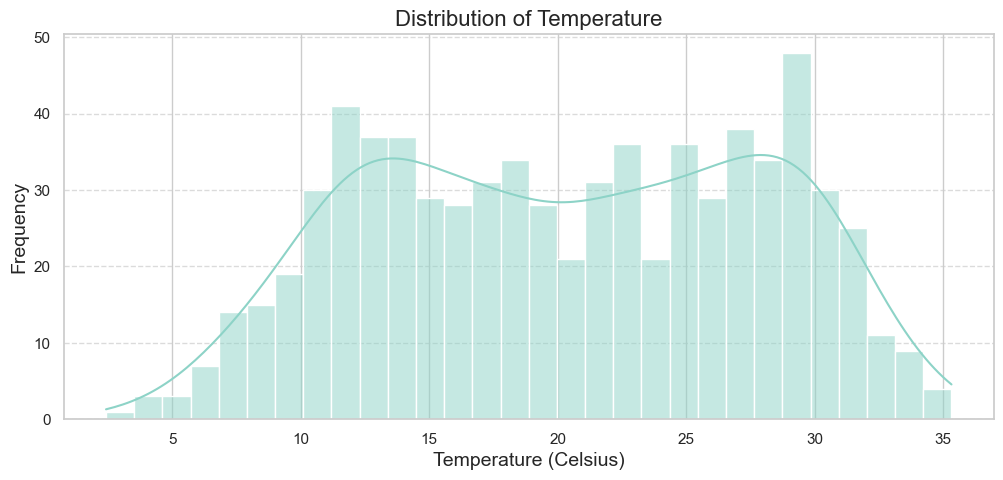

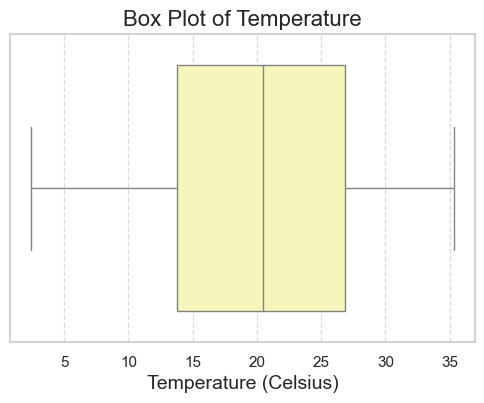

In [32]:
# Set the style for seaborn and color palette
sns.set(style='whitegrid')

# Using a larger color palette
colors = sns.color_palette("Set3", 12)  # Choose a color palette with 12 colors

### 1. Temperature (`temp`)
plt.figure(figsize=(12, 5))
sns.histplot(df['temp'], bins=30, kde=True, color=colors[0])
plt.title('Distribution of Temperature', fontsize=16)
plt.xlabel('Temperature (Celsius)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(x=df['temp'], color=colors[1])
plt.title('Box Plot of Temperature', fontsize=16)
plt.xlabel('Temperature (Celsius)', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

### Inferences

- **Normal Distribution**: The temperature data appears to be normally distributed, with most values clustered around the central region.
- **Central Tendency**: The peak of the distribution suggests that the majority of temperatures fall within the **25-30 degree Celsius** range.
- **Moderate Spread**: The data exhibits a moderate spread, with temperatures ranging from approximately **5 to 35 degrees Celsius**.
- **Absence of Outliers**: The histogram and box plot indicate that there are no significant outliers in the data.
- **Consistent Data**: The lack of outliers suggests that the data is relatively consistent and free from extreme vlues.


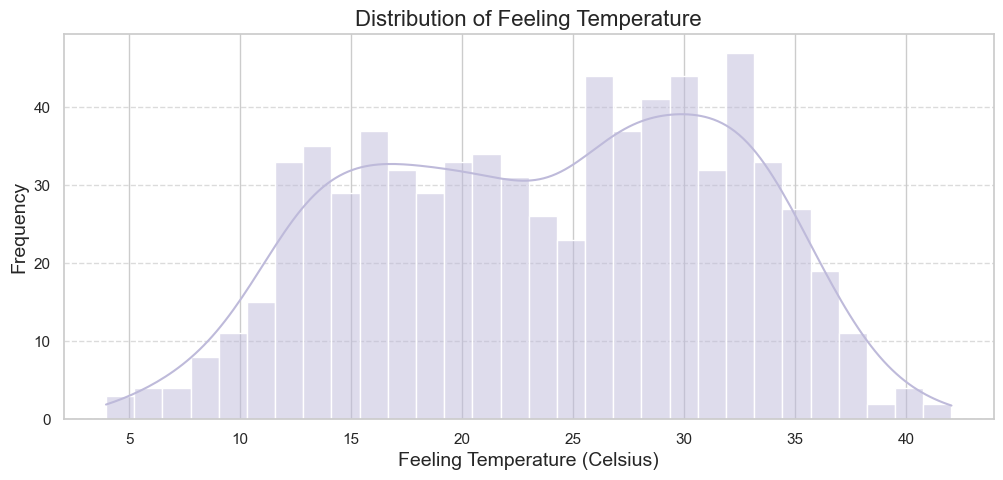

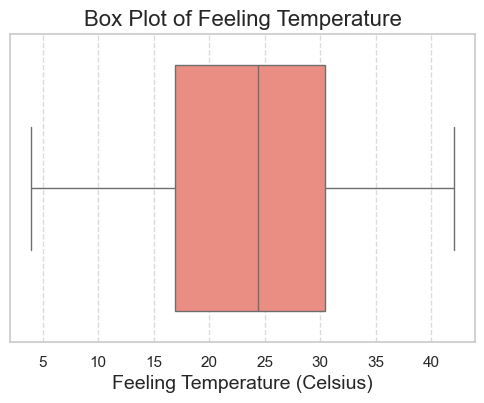

In [34]:
### 2. Feeling Temperature (`atemp`)
plt.figure(figsize=(12, 5))
sns.histplot(df['atemp'], bins=30, kde=True, color=colors[2])
plt.title('Distribution of Feeling Temperature', fontsize=16)
plt.xlabel('Feeling Temperature (Celsius)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(x=df['atemp'], color=colors[3])
plt.title('Box Plot of Feeling Temperature', fontsize=16)
plt.xlabel('Feeling Temperature (Celsius)', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

### Inferences

- **Normal Distribution**: The feeling temperature data appears to be approximately normally distributed, with most values clustered around the central region.
- **Central Tendency**: The peak of the distribution suggests that the majority of feeling temperatures fall within the **25 to 35 degree Celsius** range.
- **Moderate Spread**: The data exhibits a moderate spread, with feeling temperatures ranging from approximately **5 to 40 degrees Celsius**.
- **Absence of Outliers**: The histogram and box plot indicate that there are no significant outliers in the data.
- **Slight Right Skewness**: The distribution is slightly skewed to the right, suggesting that people tend to perceive the temperature as slightly higher than the actual temperature.

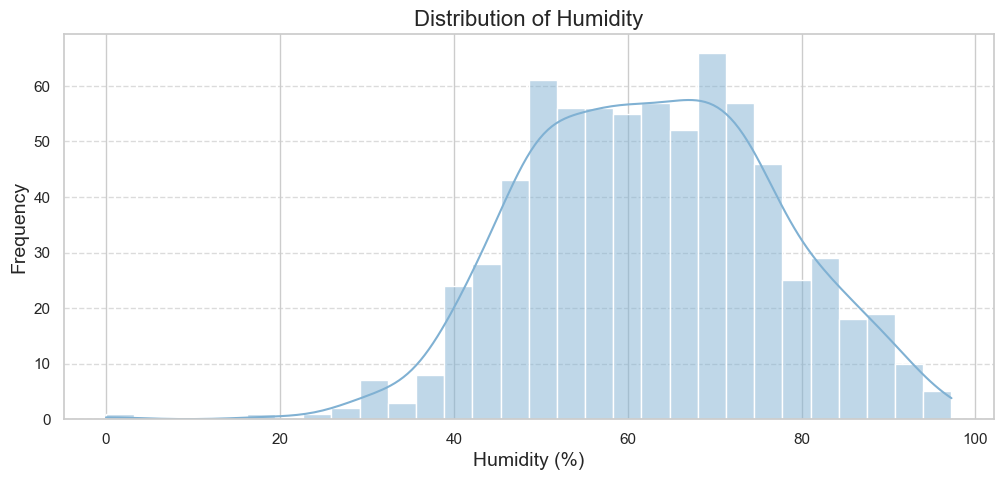

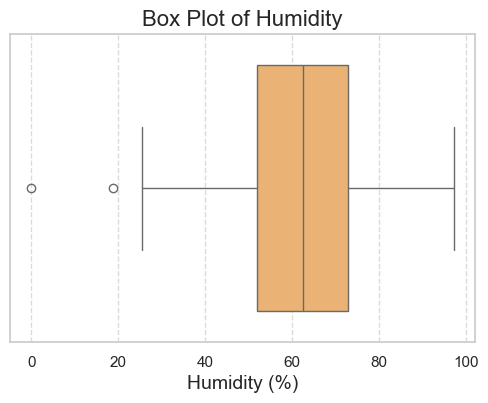

In [36]:
### 3. Humidity (`hum`)
plt.figure(figsize=(12, 5))
sns.histplot(df['hum'], bins=30, kde=True, color=colors[4])
plt.title('Distribution of Humidity', fontsize=16)
plt.xlabel('Humidity (%)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(x=df['hum'], color=colors[5])
plt.title('Box Plot of Humidity', fontsize=16)
plt.xlabel('Humidity (%)', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

### Inferences

- **Right-Skewed Distribution**: The humidity data is slightly right-skewed, with a higher concentration of values in the lower humidity range.
- **Central Tendency**: The majority of humidity readings fall within the **50 to 70%** range.
- **Moderate Spread**: The data exhibits a moderate spread, with humidity values ranging from approximately **0% to 100%**.
- **Absence of Outliers**: The histogram and box plot indicate that there are no significant outliers in the data.
- **Consistent Data**: The lack of outliers suggests that the data is relatively consistent and free from extreme values.

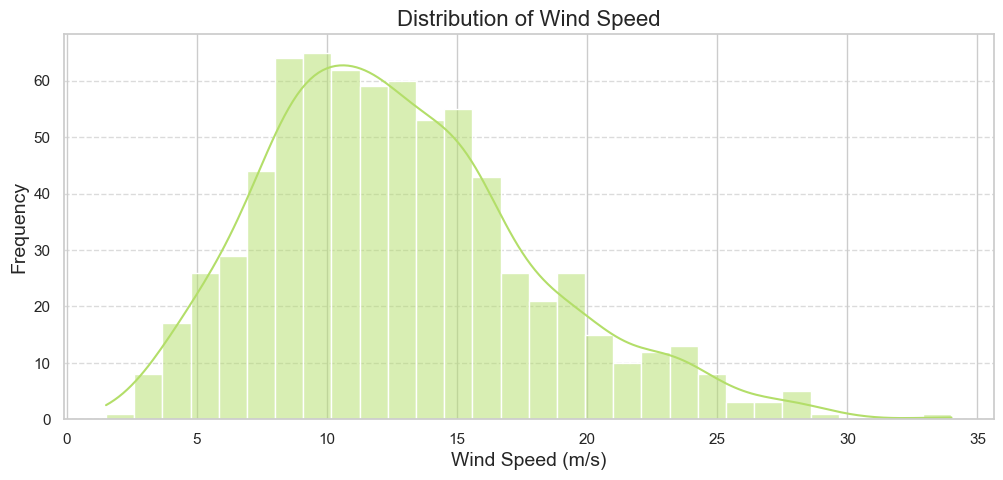

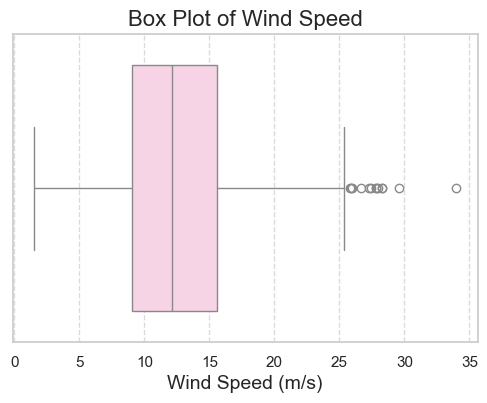

In [38]:
### 4. Wind Speed (`windspeed`)
plt.figure(figsize=(12, 5))
sns.histplot(df['windspeed'], bins=30, kde=True, color=colors[6])
plt.title('Distribution of Wind Speed', fontsize=16)
plt.xlabel('Wind Speed (m/s)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(x=df['windspeed'], color=colors[7])
plt.title('Box Plot of Wind Speed', fontsize=16)
plt.xlabel('Wind Speed (m/s)', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

### Inferences

- **Right-Skewed Distribution**: The wind speed data is slightly right-skewed, with a higher concentration of values in the lower wind speed range.
- **Central Tendency**: The majority of wind speed readings fall within the **10-15 m/s** range.
- **Moderate Spread**: The data exhibits a moderate spread, with wind speeds ranging from approximately **0 m/s to 35 m/s**.
- **Presence of Outliers**: A few outliers on the higher end of the distribution indicate occasional high wind speeds.
- **Consistent Data**: Despite the outliers, the overall data appears relatively consistent.

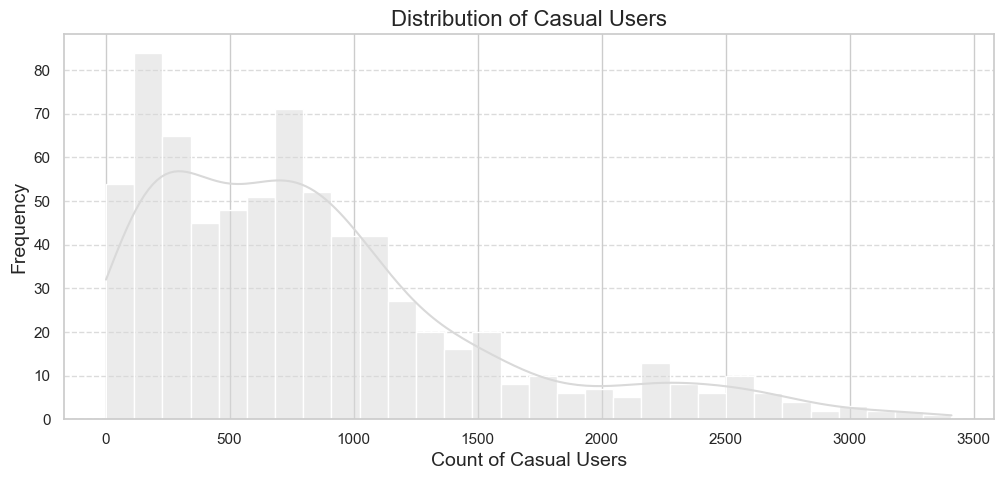

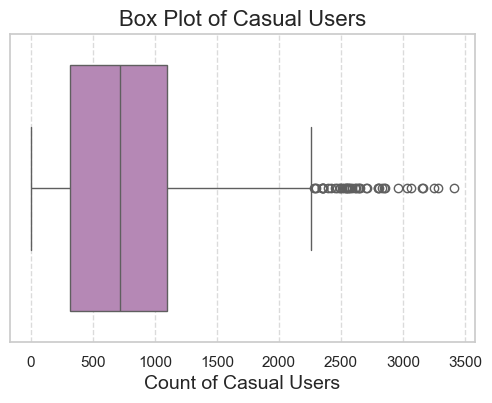

In [40]:
### 5. Casual Users (`casual`)
plt.figure(figsize=(12, 5))
sns.histplot(df['casual'], bins=30, kde=True, color=colors[8])
plt.title('Distribution of Casual Users', fontsize=16)
plt.xlabel('Count of Casual Users', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(x=df['casual'], color=colors[9])
plt.title('Box Plot of Casual Users', fontsize=16)
plt.xlabel('Count of Casual Users', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

### Inferences

- **Right-Skewed Distribution**: The casual user count data is right-skewed, with a higher concentration of values in the lower range.
- **Central Tendency**: The majority of casual user counts fall within the **500-1000** range.
- **Wide Spread**: The data exhibits a wide spread, with casual user counts ranging from approximately **0 to 3500**.
- **Presence of Outliers**: Several outliers on the higher end of the distribution indicate days with significantly higher casual user activity.
- **Consistent Data**: Despite the outliers, the overall data appears relatively consistent.

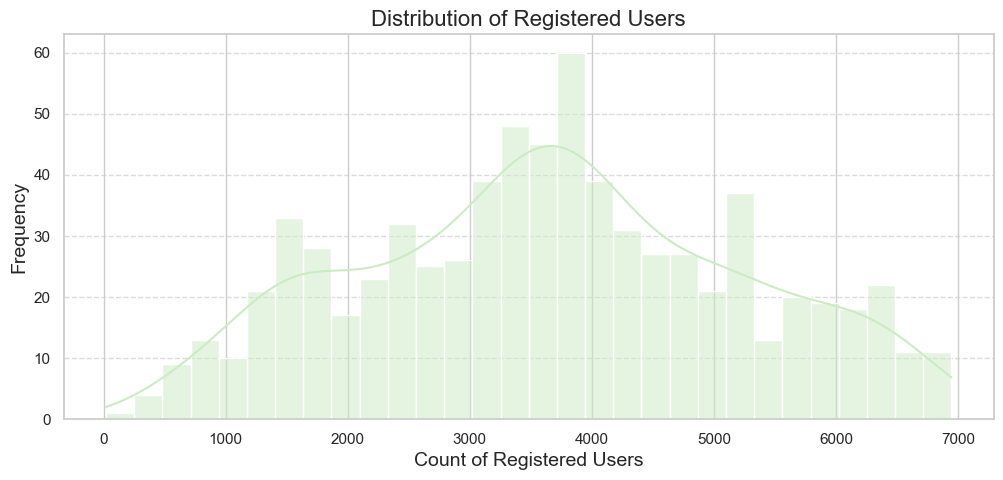

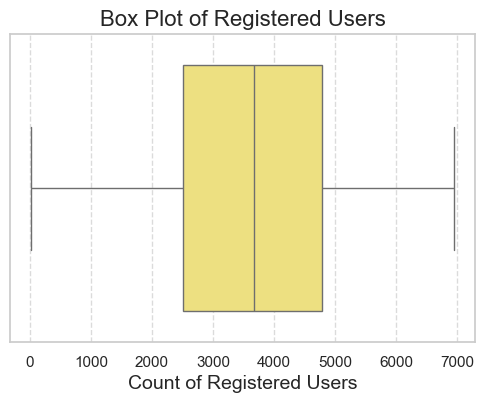

In [42]:
### 6. Registered Users (`registered`)
plt.figure(figsize=(12, 5))
sns.histplot(df['registered'], bins=30, kde=True, color=colors[10])
plt.title('Distribution of Registered Users', fontsize=16)
plt.xlabel('Count of Registered Users', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(x=df['registered'], color=colors[11])
plt.title('Box Plot of Registered Users', fontsize=16)
plt.xlabel('Count of Registered Users', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

### Inferences

- **Right-Skewed Distribution**: The registered user count data is slightly right-skewed, with a higher concentration of values in the lower range.
- **Central Tendency**: The majority of registered user counts fall within the **3000-4000** range.
- **Moderate Spread**: The data exhibits a moderate spread, with registered user counts ranging from approximately **0 to 7000**.
- **Absence of Outliers**: The histogram and box plot indicate that there are no significant outliers in the data.
- **Consistent Data**: The lack of outliers suggests that the data is relatively consistent and free from extreme values.

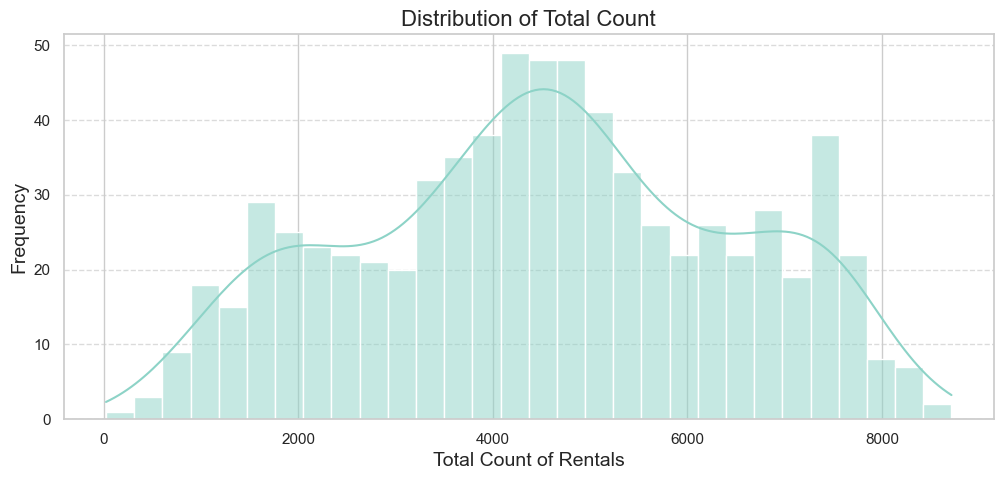

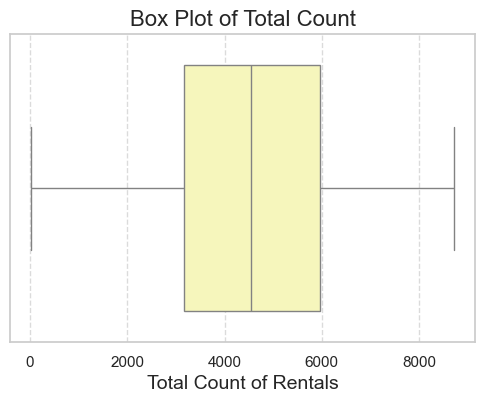

In [44]:
### 7. Total Count (`cnt`)
plt.figure(figsize=(12, 5))
sns.histplot(df['cnt'], bins=30, kde=True, color=colors[0])  # Reusing first color
plt.title('Distribution of Total Count', fontsize=16)
plt.xlabel('Total Count of Rentals', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(x=df['cnt'], color=colors[1])  # Reusing second color
plt.title('Box Plot of Total Count', fontsize=16)
plt.xlabel('Total Count of Rentals', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

### Inferences

- **Right-Skewed Distribution**: The total rental count data is slightly right-skewed, with a higher concentration of values in the lower range.
- **Central Tendency**: The majority of total rental counts fall within the **4000-5000** range.
- **Wide Spread**: The data exhibits a wide spread, with total rental counts ranging from approximately **0 to 8000**.
- **Absence of Outliers**: The histogram and box plot indicate that there are no significant outliers in the data.
- **Consistent Data**: The lack of outliers suggests that the data is relatively consistent and free from extreme values.

### Bi-Variate Analysis

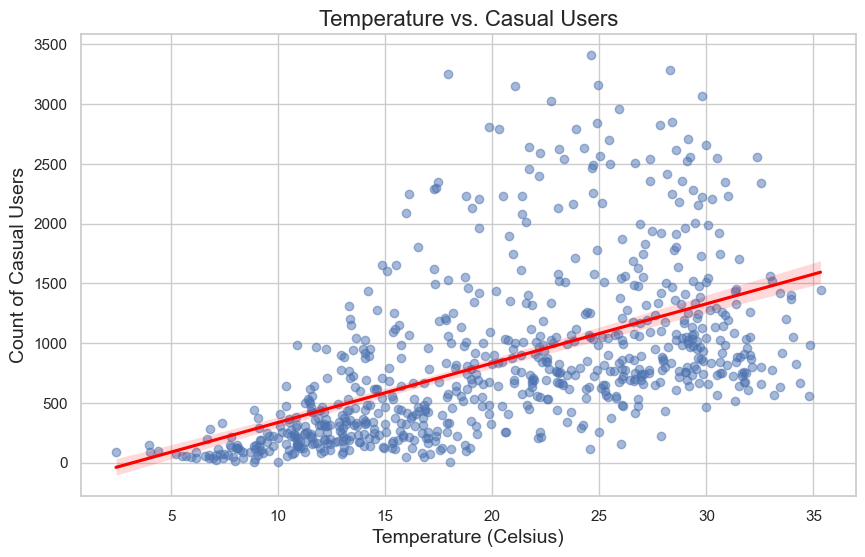

In [47]:
# Temperature Vs Casual users

plt.figure(figsize=(10, 6))
sns.regplot(x='temp', y='casual', data=df, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Temperature vs. Casual Users', fontsize=16)
plt.xlabel('Temperature (Celsius)', fontsize=14)
plt.ylabel('Count of Casual Users', fontsize=14)
plt.grid(True)
plt.show()

#### Inferences from Temperature vs. Casual Users Analysis
 
- There is a positive correlation between temperature and the number of casual users, suggesting that as the temperature increases, more people tend to rent bikes.
- The linear trend indicates that the relationship between temperature and casual users is approximately linear within the observed range.
- Some data points deviate from the overall trend, indicating that other factors might be influencing the number of casual users.
- Factors such as weather conditions, holidays, and special events could also impact the number of casual users, leading to deviations from the linear trend.

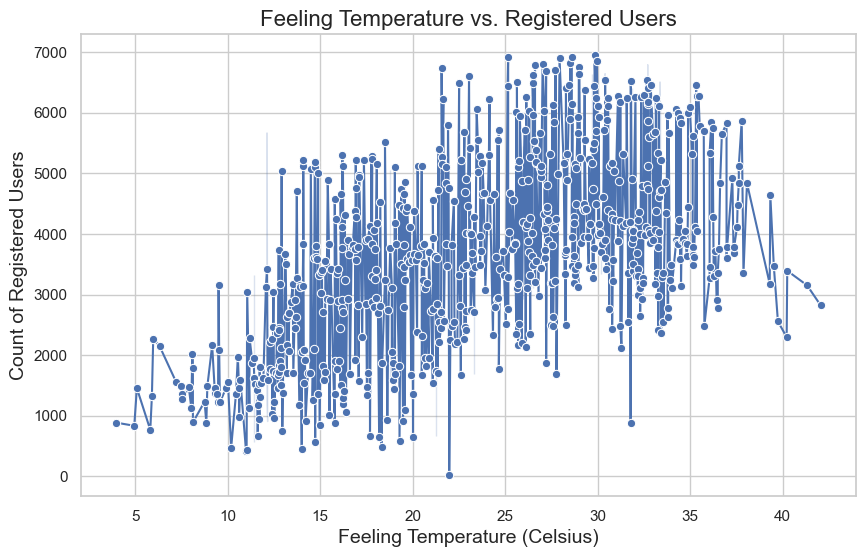

In [49]:
# Feeling Temperature Vs Registered Users

plt.figure(figsize=(10, 6))
sns.lineplot(x='atemp', y='registered', data=df, marker='o')
plt.title('Feeling Temperature vs. Registered Users', fontsize=16)
plt.xlabel('Feeling Temperature (Celsius)', fontsize=14)
plt.ylabel('Count of Registered Users', fontsize=14)
plt.grid(True)
plt.show()

#### Inferences from Feeling Temperature vs. Registered Users Analysis

1. **Weaker Correlation**: The relationship between feeling temperature and registered users appears to be weaker compared to the relationship between temperature and casual users.

2. **Nonlinear Trend**: The trend is not strictly linear, suggesting that other factors might be influencing the number of registered users.

3. **Clustered Data**: The data points seem to cluster in certain regions, indicating potential variations in usage patterns based on other factors.

4. **Potential Factors**: Factors such as weather conditions, holidays, and special events could also impact the number of registered users, leading to deviations from any underlying trend.

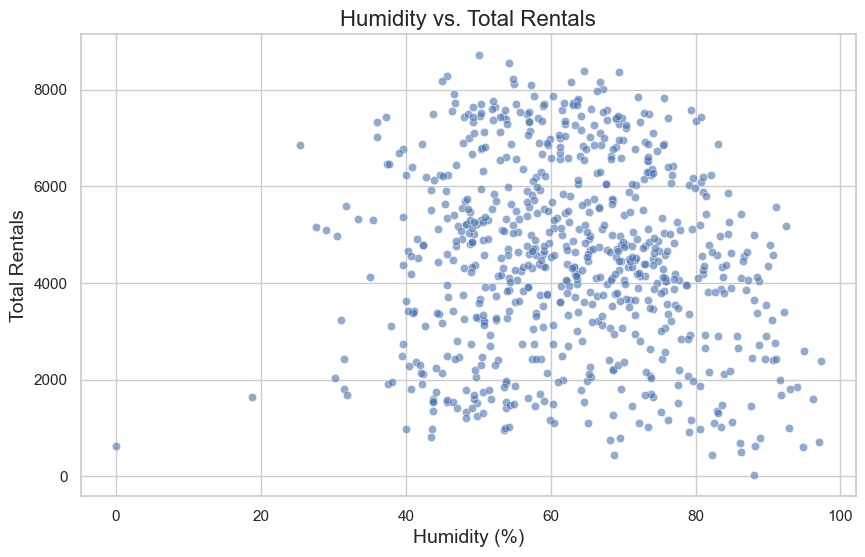

In [51]:
# Humidity Vs Total Rentals

plt.figure(figsize=(10, 6))
sns.scatterplot(x='hum', y='cnt', data=df, alpha=0.6)
plt.title('Humidity vs. Total Rentals', fontsize=16)
plt.xlabel('Humidity (%)', fontsize=14)
plt.ylabel('Total Rentals', fontsize=14)
plt.grid(True)
plt.show()

#### Inferences from Humidity vs. Total Rentals Analysis

1. **Weak Correlation**: The relationship between humidity and total rentals appears to be weak, indicating that humidity might not be a major factor influencing bike rentals.

2. **No Clear Trend**: There is no clear linear trend in the data. The points are scattered across the plot, suggesting that other factors might be more influential.

3. **Potential Factors**: Factors such as temperature, weather conditions, and the day of the week likely play a more significant role in determining the number of bike rentals.

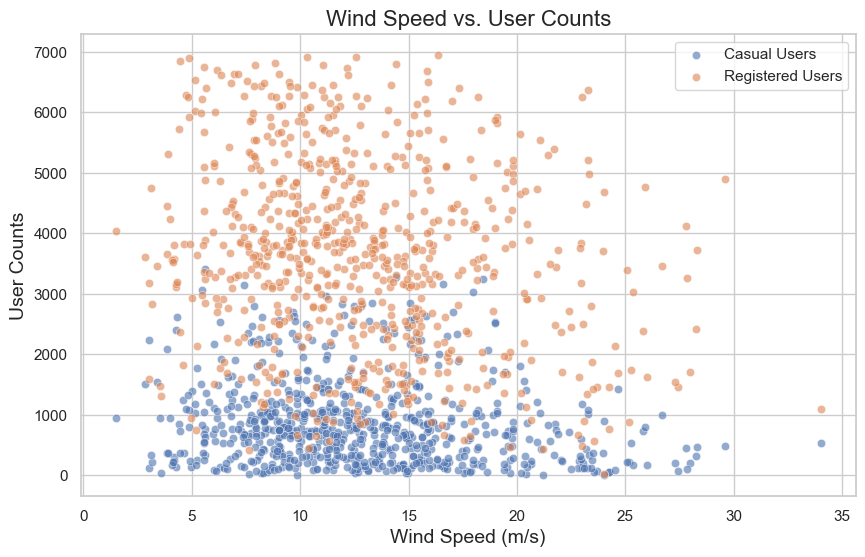

In [53]:
# Wind Speed Vs User Counts

plt.figure(figsize=(10, 6))
sns.scatterplot(x='windspeed', y='casual', data=df, label='Casual Users', alpha=0.6)
sns.scatterplot(x='windspeed', y='registered', data=df, label='Registered Users', alpha=0.6)
plt.title('Wind Speed vs. User Counts', fontsize=16)
plt.xlabel('Wind Speed (m/s)', fontsize=14)
plt.ylabel('User Counts', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

#### Inferences from Wind Speed Analysis

1. **No Strong Correlation**: There is no strong linear correlation between wind speed and either casual or registered user counts. The data points are scattered across the plot, indicating that wind speed might not be a major factor influencing bike rentals.

2. **Potential Factors**: Other factors such as temperature, humidity, and the day of the week likely play a more significant role in determining the number of bike rentals.

3. **Clustered Data**: The data points seem to cluster in certain regions, suggesting that wind speed might interact with other factors to influence bike rental usage.


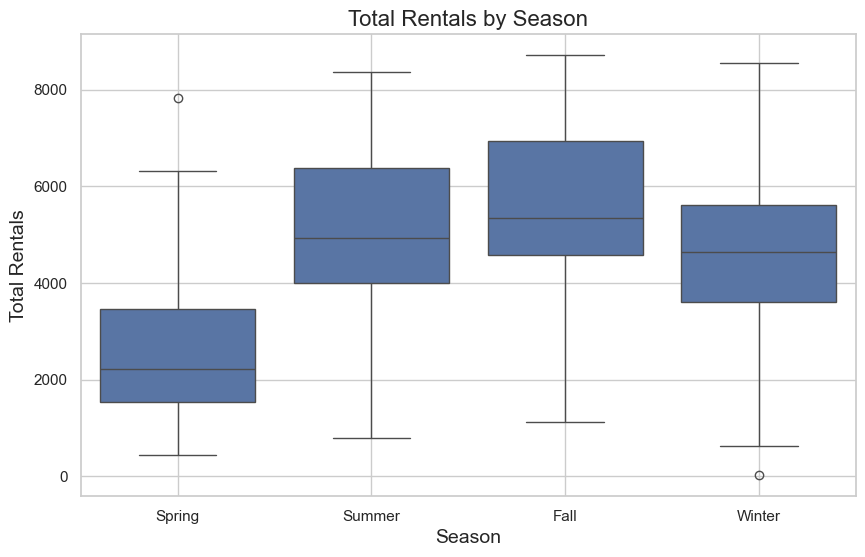

In [55]:
# Total Rentals Vs Season

plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='cnt', data=df)
plt.title('Total Rentals by Season', fontsize=16)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Total Rentals', fontsize=14)
plt.xticks(ticks=[0, 1, 2, 3], labels=['Spring', 'Summer', 'Fall', 'Winter'])
plt.grid(True)
plt.show()

#### Inferences from Seasonal Variation Analysis

1. **Seasonal Variation**: The total number of rentals is `significantly higher in the fall season` compared to the other seasons.

2. **Similar Summer and Winter**: The summer and winter seasons exhibit similar rental patterns, with the median rental count being slightly higher in the summer.

3. **Spring**: The `spring season has the lowest median rental count` among the four seasons.

4. **Outliers**: There are a few outliers in the summer and winter seasons, indicating days with exceptionally high or low rental counts.

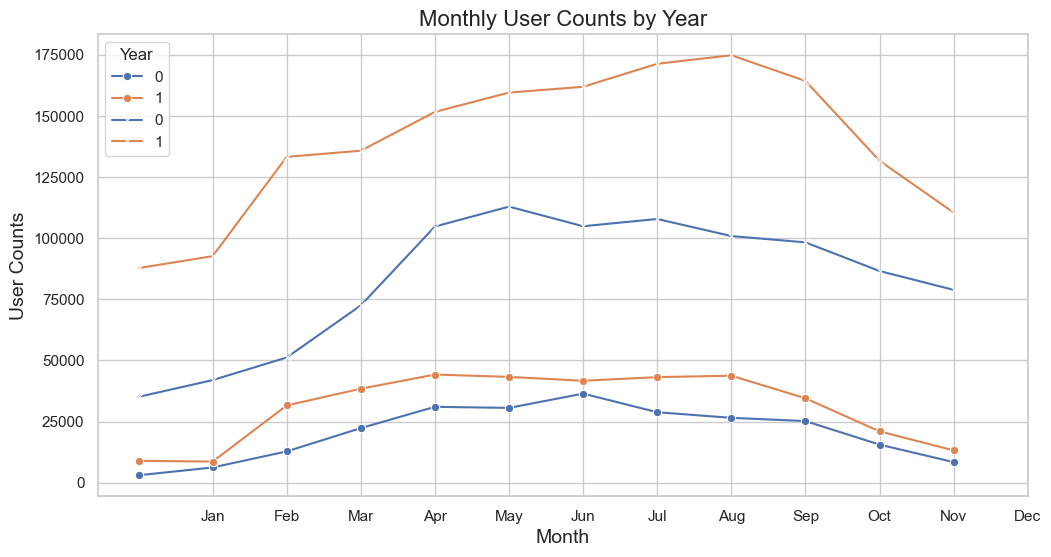

In [57]:
# Create a new DataFrame for yearly analysis

yearly_data = df.groupby(['yr', 'mnth']).agg({'casual': 'sum', 'registered': 'sum'}).reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_data, x='mnth', y='casual', hue='yr', marker='o')
sns.lineplot(data=yearly_data, x='mnth', y='registered', hue='yr', marker='x')
plt.title('Monthly User Counts by Year', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('User Counts', fontsize=14)
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year', loc='upper left')
plt.grid(True)
plt.show()

#### Inferences from User Counts Analysis

1. **Seasonal Pattern**: Both casual and registered user counts exhibit a clear seasonal pattern, with `peaks in the summer months (June-July) and dips in the winter months (December-January)`.

2. **Year-over-Year Growth**: The overall trend for both casual and registered users appears to be `upward from 2018 to 2019, indicating a growing popularity of bike rentals over the years`.

3. **Registered Users Dominance**: Registered users consistently outnumber casual users throughout the year, suggesting that `a significant portion of the user base is loyal and uses the service regularly`.

4. **Seasonal Variation in Growth**: While both user types follow the seasonal trend, the relative increase in registered users may be more pronounced during certain seasons, indicating potential strategies to target specific user segments.

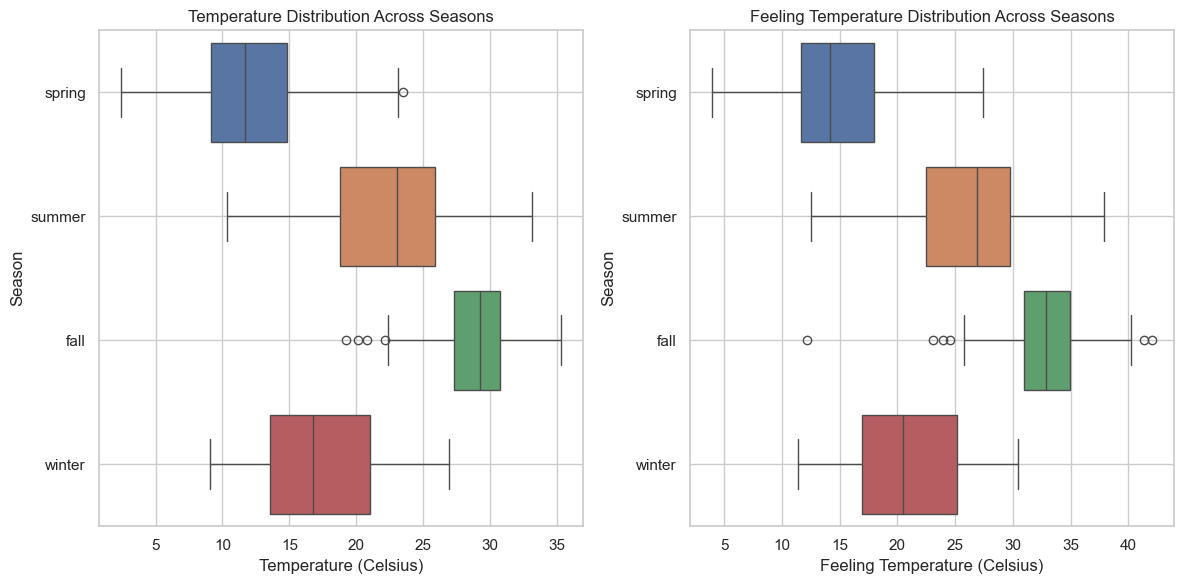

In [59]:
# Temperature Vs Seasons

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Create a boxplot for temperature distribution across seasons
sns.boxplot(x='temp', y='season', data=df, hue='season', ax=axes[0])
axes[0].set_title('Temperature Distribution Across Seasons')
axes[0].set_xlabel('Temperature (Celsius)')
axes[0].set_ylabel('Season')
axes[0].grid(True)  # Enable grid for the first plot

# Create a boxplot for feeling temperature distribution across seasons
sns.boxplot(x='atemp', y='season', data=df, hue='season', ax=axes[1])
axes[1].set_title('Feeling Temperature Distribution Across Seasons')
axes[1].set_xlabel('Feeling Temperature (Celsius)')
axes[1].set_ylabel('Season')
axes[1].grid(True)  # Enable grid for the second plot

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

### Observations from Boxplots

1. **Temperature and Feeling Temperature Variation**  
   The boxplots demonstrate that the distributions of both actual temperature and feeling temperature vary across different seasons.

2. **Narrower Ranges in Spring and Winter**  
   Spring and winter exhibit narrower temperature ranges when compared to summer and fall, indicating more stable conditions during these seasons.

3. **Feeling Temperature vs. Actual Temperature**  
   The feeling temperature generally follows a similar pattern to the actual temperature but tends to be slightly higher. This difference can be attributed to factors such as humidity and wind speed.

4. **Presence of Outliers**  
   The outliers observed in some seasons suggest the occurrence of specific weather events or anomalies that deviate from the typical temperatue patterns.
s.


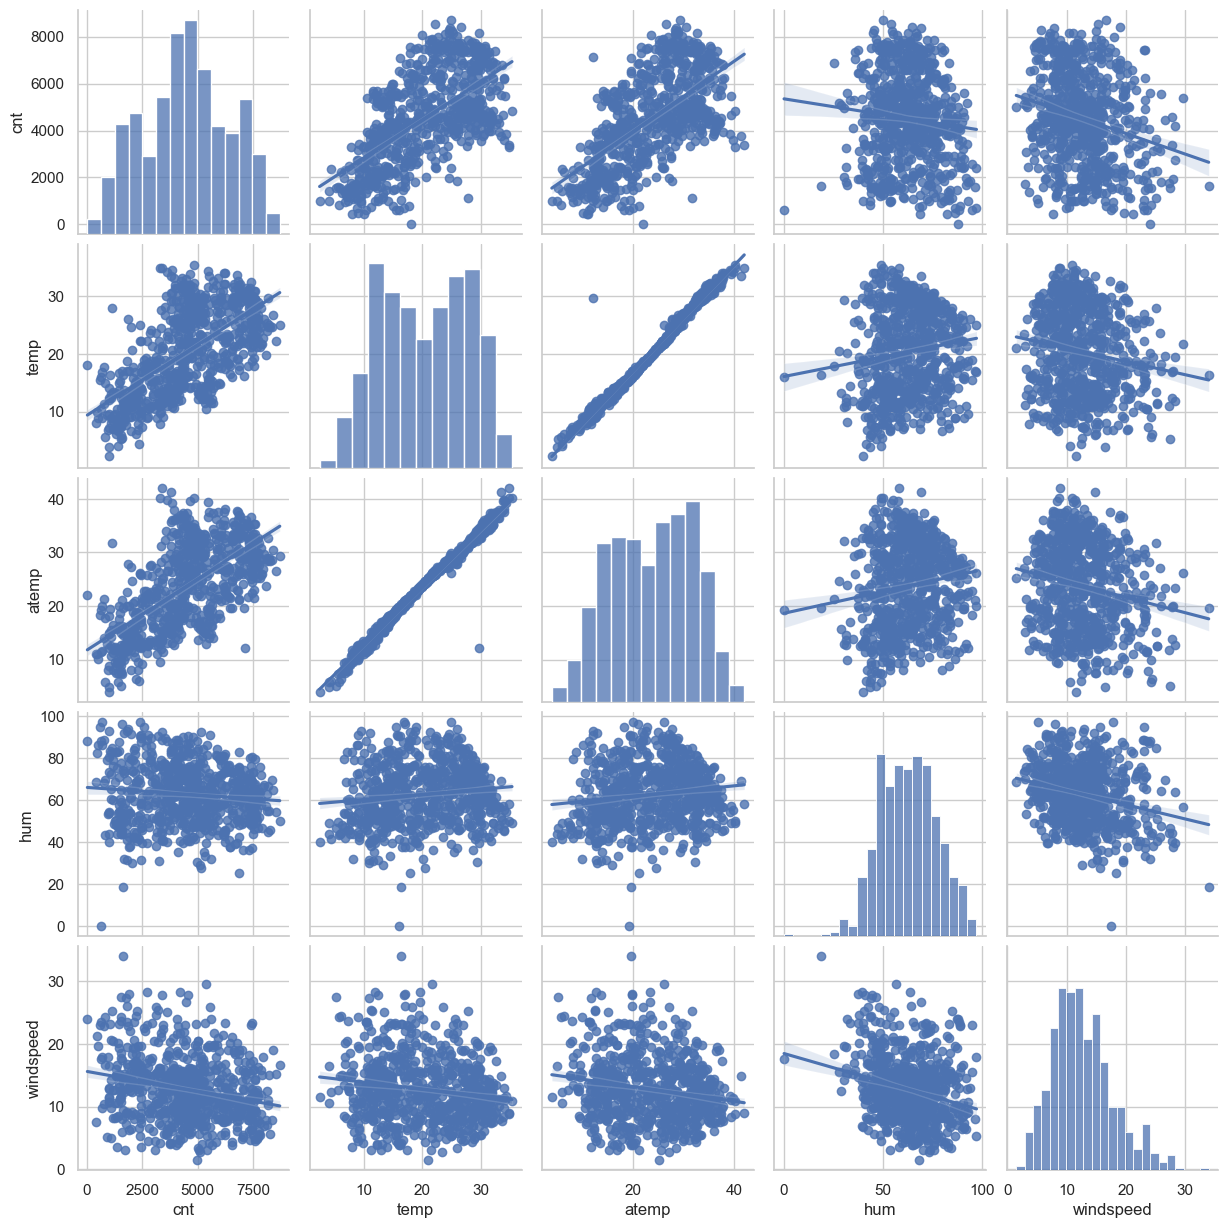

In [61]:
# Lets plot pairplots to have better to see if cnt is linearly  depend upon its independent variables. 

numerical_variabels=['cnt', 'temp', 'atemp', 'hum','windspeed']
sns.pairplot(data=df,vars=numerical_variabels, kind="reg")
plt.show()

#### Inferences:

1. We can see that we have linealy dependecy between temp, atemp and count.
2. we can also see that `temp and atemp are highly correlated`.

### Generate Bar Plots for all Categorical Features

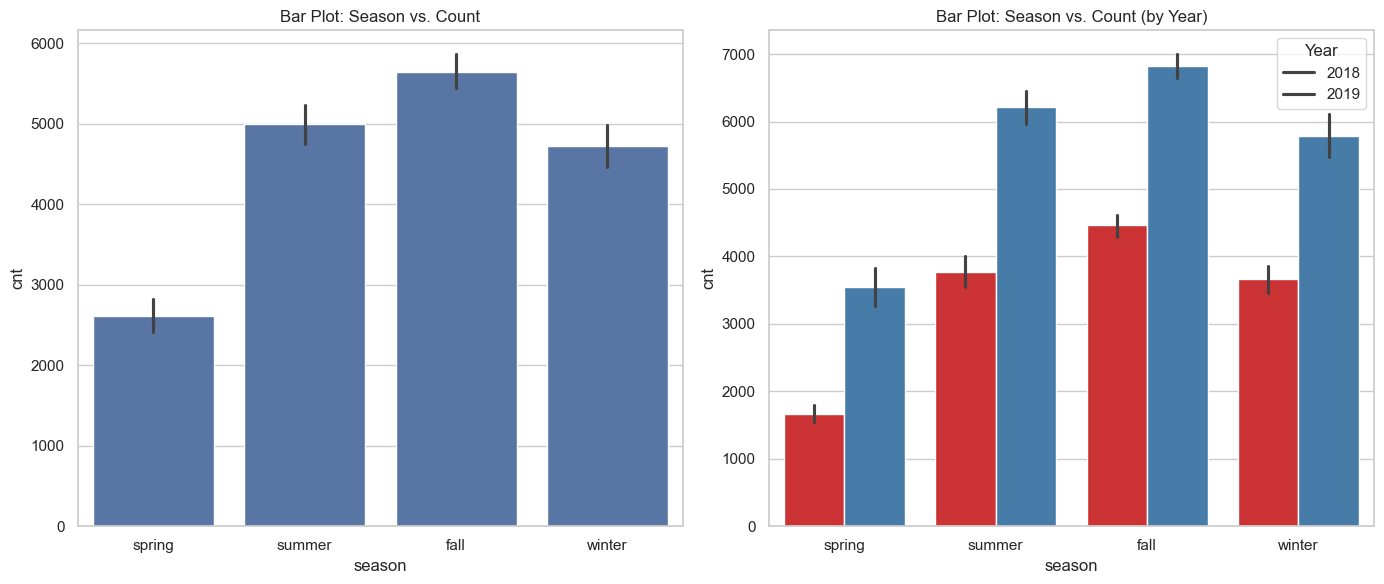


Inferences on Season vs Count:
-------------------------------
- Season - 'Fall' has a high number of bike rentals.
- Bike rental in the year 2019 has increased for every season when compared to the year 2018.



In [64]:
# Plot for Season vs. Count

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='season', y='cnt', data=df)
plt.title('Bar Plot: Season vs. Count')

plt.subplot(1, 2, 2)
sns.barplot(x='season', y='cnt', data=df, hue='yr', palette='Set1')
plt.title('Bar Plot: Season vs. Count (by Year)')
plt.legend(title='Year', labels=['2018', '2019'])

plt.tight_layout()
plt.show()

# Inferences
inferences_season = """
Inferences on Season vs Count:
-------------------------------
- Season - 'Fall' has a high number of bike rentals.
- Bike rental in the year 2019 has increased for every season when compared to the year 2018.
"""
print(inferences_season)

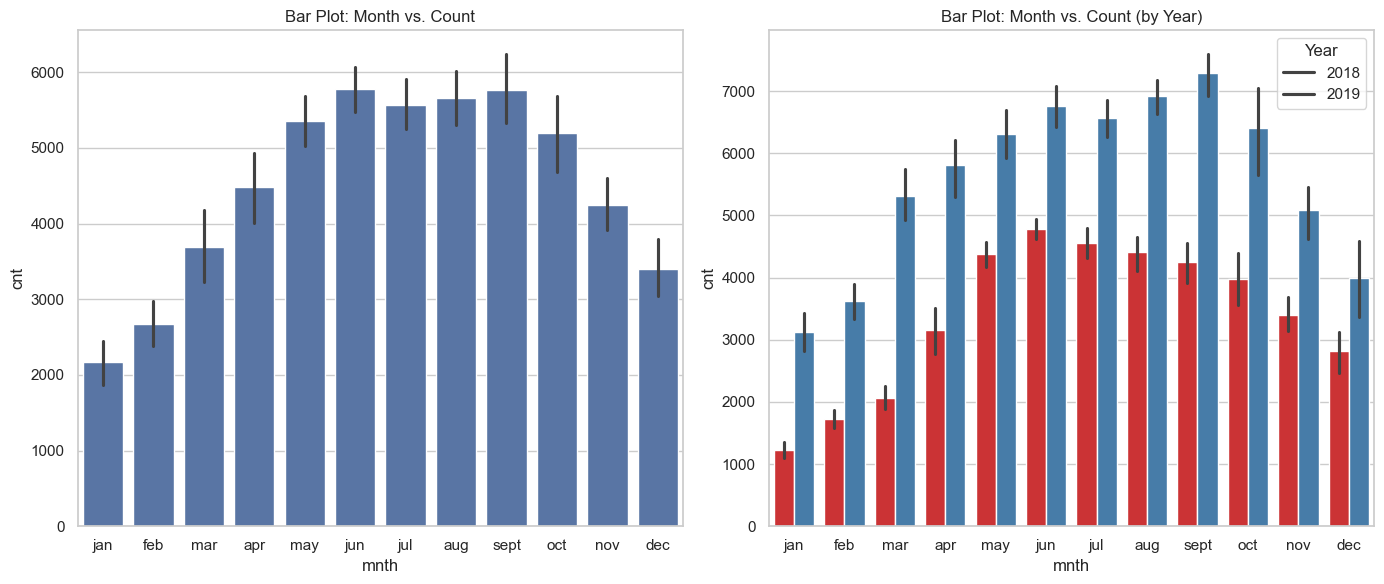


Inferences on Month vs Count:
-------------------------------
- More bike registrations are happening in the months of May to October.
- Bike registration in the year 2019 has increased for every month when compared to the year 2018.



In [65]:
# Plot for Month vs. Count
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='mnth', y='cnt', data=df)
plt.title('Bar Plot: Month vs. Count')

plt.subplot(1, 2, 2)
sns.barplot(x='mnth', y='cnt', data=df, hue='yr', palette='Set1')
plt.title('Bar Plot: Month vs. Count (by Year)')
plt.legend(title='Year', labels=['2018', '2019'])

plt.tight_layout()
plt.show()

# Inferences
inferences_month = """
Inferences on Month vs Count:
-------------------------------
- More bike registrations are happening in the months of May to October.
- Bike registration in the year 2019 has increased for every month when compared to the year 2018.
"""
print(inferences_month)

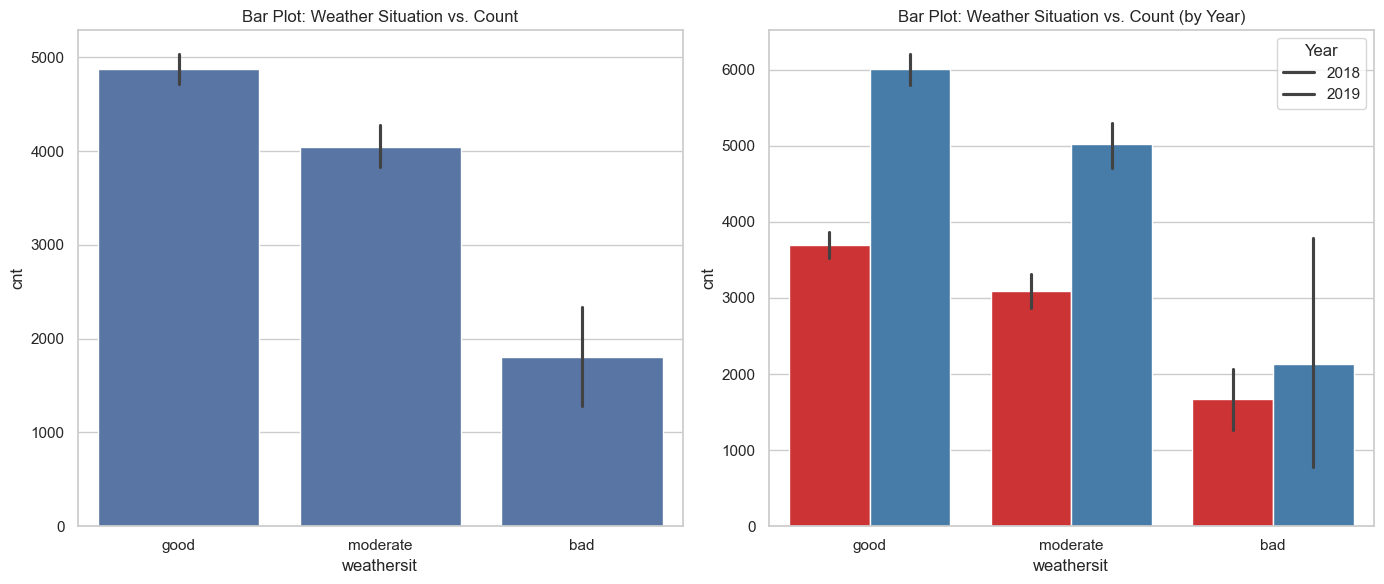


Inferences on Weather Situation vs Count:
------------------------------------------
- It is clearly indicating that people prefer bike rentals when the weather situation is good.
- Moderate weather conditions result in a significant drop in rentals compared to good weather.
- Bad weather conditions lead to the lowest number of rentals, as adverse conditions deter people from using bikes.



In [66]:
# Plot for Weather Situation vs. Count
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='weathersit', y='cnt', data=df)
plt.title('Bar Plot: Weather Situation vs. Count')

plt.subplot(1, 2, 2)
sns.barplot(x='weathersit', y='cnt', data=df, hue='yr', palette='Set1')
plt.title('Bar Plot: Weather Situation vs. Count (by Year)')
plt.legend(title='Year', labels=['2018', '2019'])

plt.tight_layout()
plt.show()

# Inferences
inferences_weathersit = """
Inferences on Weather Situation vs Count:
------------------------------------------
- It is clearly indicating that people prefer bike rentals when the weather situation is good.
- Moderate weather conditions result in a significant drop in rentals compared to good weather.
- Bad weather conditions lead to the lowest number of rentals, as adverse conditions deter people from using bikes.
"""
print(inferences_weathersit)

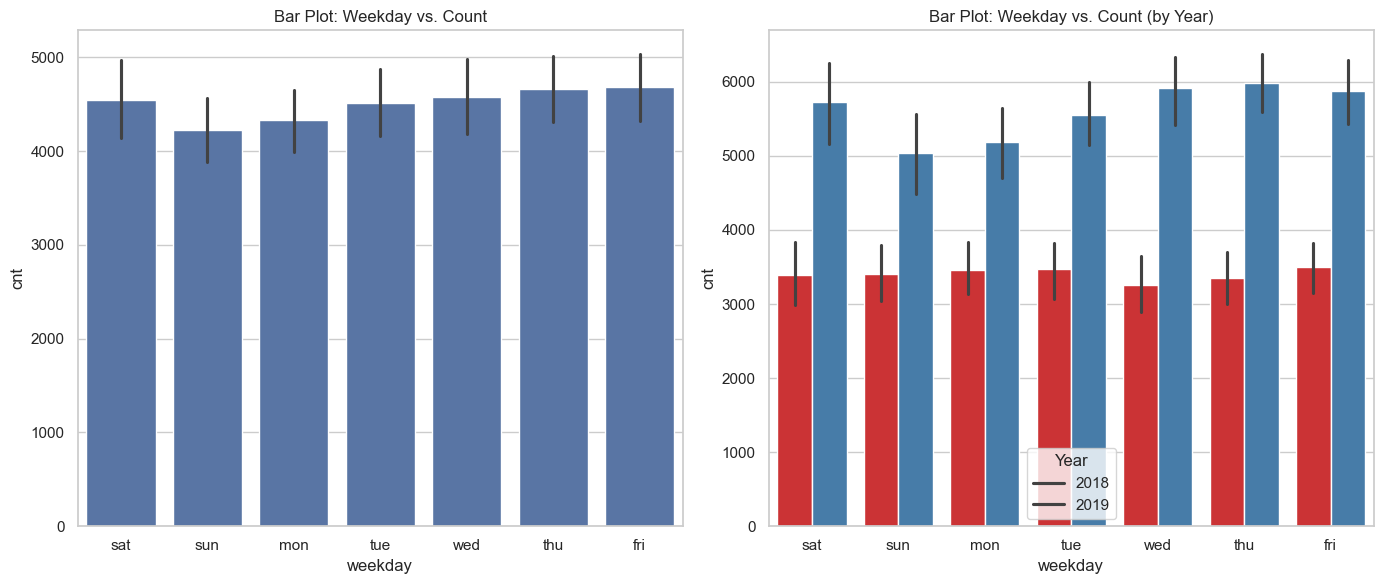


Inferences on Weekday vs Count:
-------------------------------
- Good weather conditions significantly increase bike rentals, while bad weather decreases them.
- Weekend days exhibit higher rental counts compared to weekdays, indicating greater leisure activity.
- Weekday usage patterns are relatively consistent, showing less fluctuation in rental counts.
- Seasonal variations in rentals suggest higher usage during spring and summer compared to fall and winter.



In [67]:
# Plot for Weekday vs. Count
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='weekday', y='cnt', data=df)
plt.title('Bar Plot: Weekday vs. Count')

plt.subplot(1, 2, 2)
sns.barplot(x='weekday', y='cnt', data=df, hue='yr', palette='Set1')
plt.title('Bar Plot: Weekday vs. Count (by Year)')
plt.legend(title='Year', labels=['2018', '2019'])

plt.tight_layout()
plt.show()

# Inferences
inferences_weekday = """
Inferences on Weekday vs Count:
-------------------------------
- Good weather conditions significantly increase bike rentals, while bad weather decreases them.
- Weekend days exhibit higher rental counts compared to weekdays, indicating greater leisure activity.
- Weekday usage patterns are relatively consistent, showing less fluctuation in rental counts.
- Seasonal variations in rentals suggest higher usage during spring and summer compared to fall and winter.
"""
print(inferences_weekday)

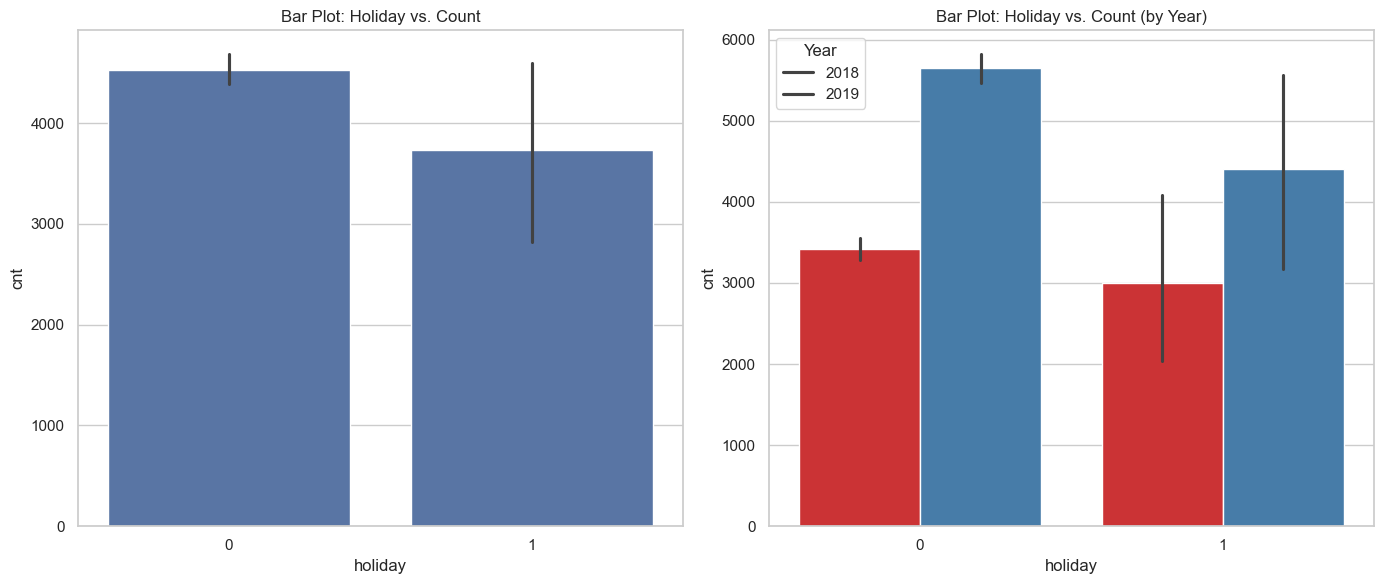


Inferences on Holiday vs Count:
--------------------------------
- Overall Impact of Holidays: The bar plots indicate that bike rentals decrease significantly on holidays compared to non-holiday days.
- Consistent Trend: This trend is observed consistently in both 2018 and 2019, highlighting a reliable pattern.
- Possible Reasons: People may alter their routines on holidays, leading to less bike usage, and family activities could take precedence over individual pursuits like biking.
- Implications for Bike-Sharing Companies: Companies may need to adjust their fleet size and operations during holidays to align with reduced demand. Additionally, targeted marketing strategies or promotions could be implemented to encourage bike rentals during leisure activities.



In [68]:
# Plot for Holiday vs. Count
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='holiday', y='cnt', data=df)
plt.title('Bar Plot: Holiday vs. Count')

plt.subplot(1, 2, 2)
sns.barplot(x='holiday', y='cnt', data=df, hue='yr', palette='Set1')
plt.title('Bar Plot: Holiday vs. Count (by Year)')
plt.legend(title='Year', labels=['2018', '2019'])

plt.tight_layout()
plt.show()

# Inferences
inferences_holiday = """
Inferences on Holiday vs Count:
--------------------------------
- Overall Impact of Holidays: The bar plots indicate that bike rentals decrease significantly on holidays compared to non-holiday days.
- Consistent Trend: This trend is observed consistently in both 2018 and 2019, highlighting a reliable pattern.
- Possible Reasons: People may alter their routines on holidays, leading to less bike usage, and family activities could take precedence over individual pursuits like biking.
- Implications for Bike-Sharing Companies: Companies may need to adjust their fleet size and operations during holidays to align with reduced demand. Additionally, targeted marketing strategies or promotions could be implemented to encourage bike rentals during leisure activities.
"""
print(inferences_holiday)

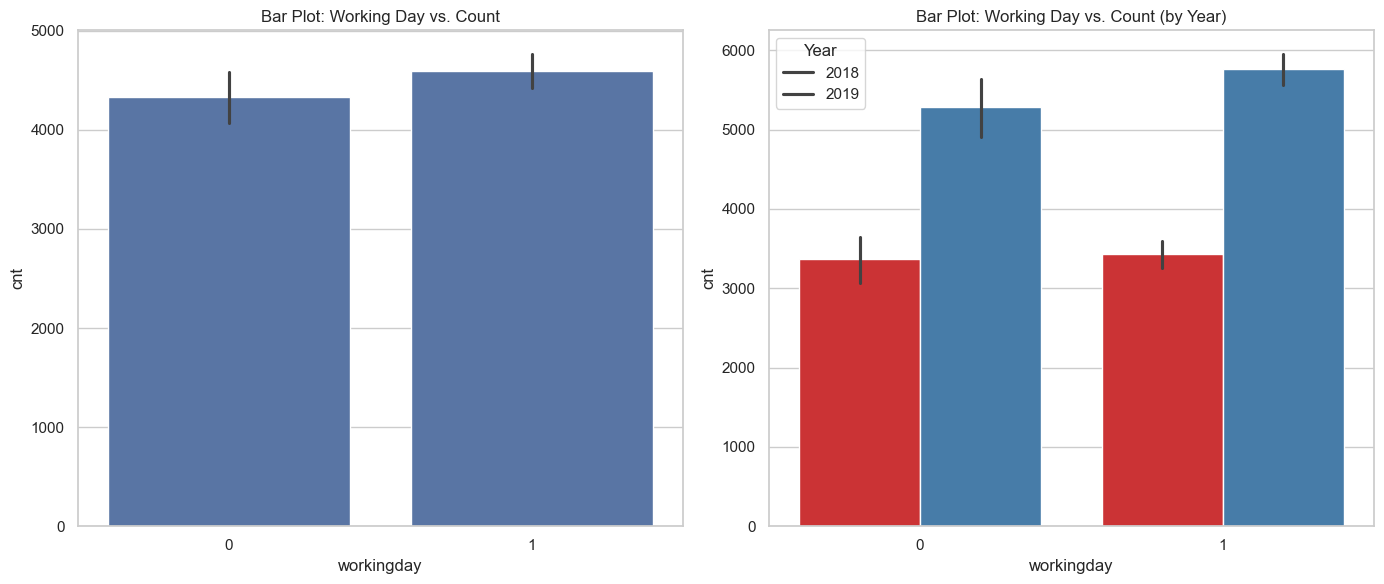


Inferences on Workingday vs Count:
-----------------------------------
- Significant Difference: There is a notable disparity in bike rentals between working and non-working days, with higher usage on working days.
- Consistent Trend: This trend has remained stable across both 2018 and 2019, indicating reliable patterns in user behavior.
- Implications for Operations: Bike-sharing companies can optimize fleet management for higher demand during working days and implement dynamic pricing strategies to encourage usage during off-peak hours.
- Targeted Marketing: Marketing campaigns can be tailored to boost user engagement during non-peak hours on working days, enhancing overall user experience.



In [69]:
# Plot for Working Day vs. Count
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='workingday', y='cnt', data=df)
plt.title('Bar Plot: Working Day vs. Count')

plt.subplot(1, 2, 2)
sns.barplot(x='workingday', y='cnt', data=df, hue='yr', palette='Set1')
plt.title('Bar Plot: Working Day vs. Count (by Year)')
plt.legend(title='Year', labels=['2018', '2019'])

plt.tight_layout()
plt.show()

# Inferences
inferences_workingday = """
Inferences on Workingday vs Count:
-----------------------------------
- Significant Difference: There is a notable disparity in bike rentals between working and non-working days, with higher usage on working days.
- Consistent Trend: This trend has remained stable across both 2018 and 2019, indicating reliable patterns in user behavior.
- Implications for Operations: Bike-sharing companies can optimize fleet management for higher demand during working days and implement dynamic pricing strategies to encourage usage during off-peak hours.
- Targeted Marketing: Marketing campaigns can be tailored to boost user engagement during non-peak hours on working days, enhancing overall user experience.
"""
print(inferences_workingday)

## Multi-Variate Analysis:

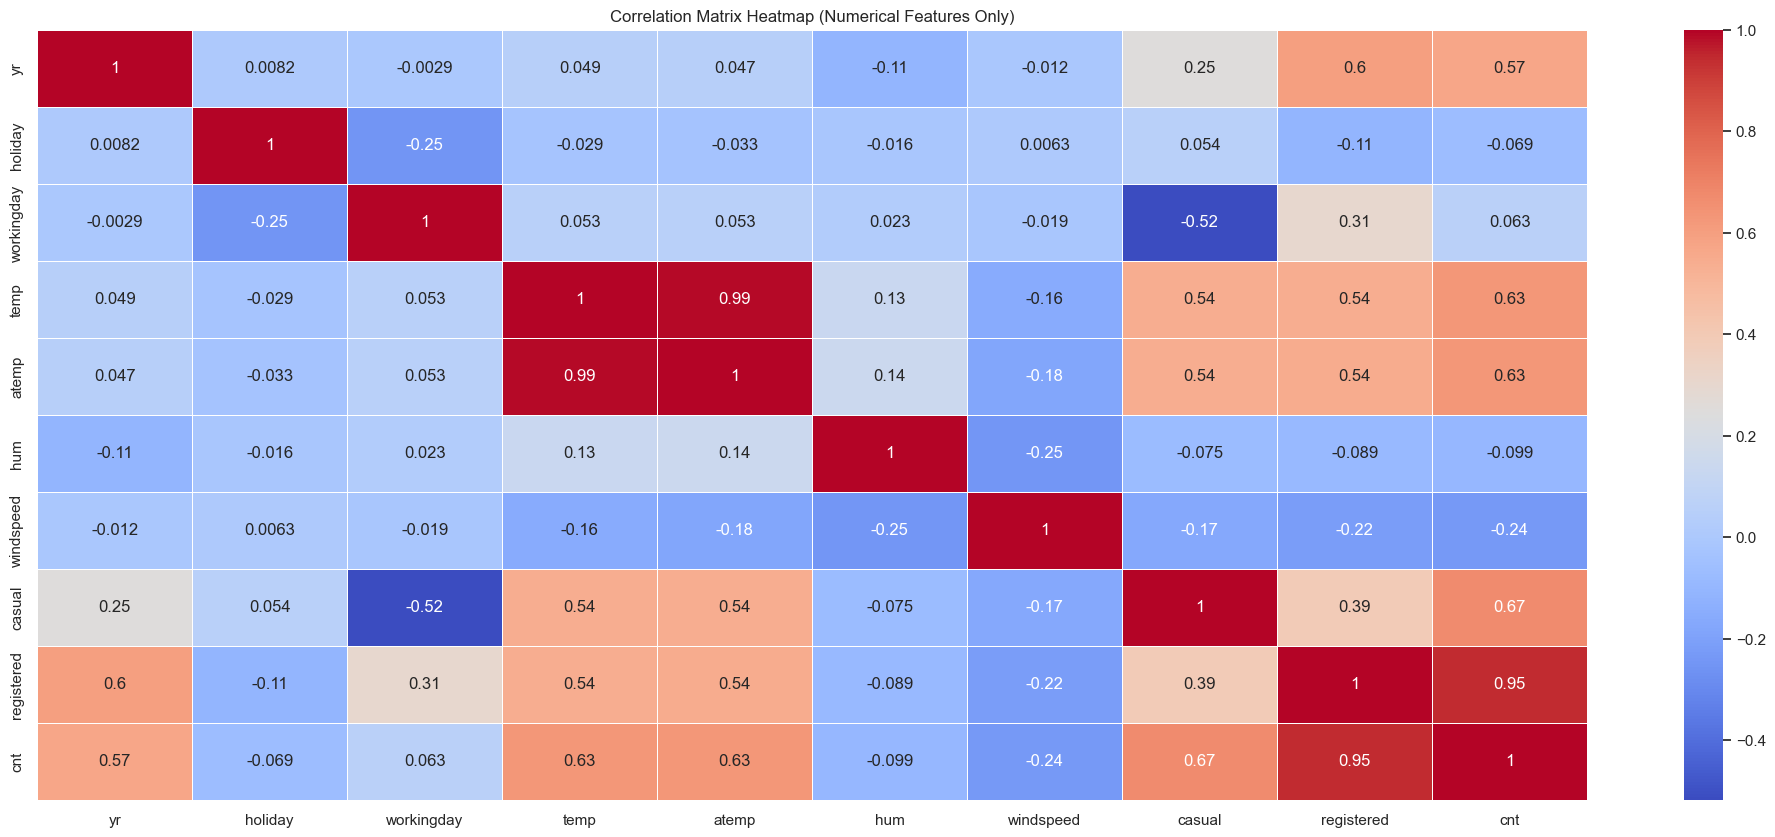

In [71]:
# Filter only numerical columns
numerical_df = df.select_dtypes(include=[np.number])

# Plot the correlation matrix (heatmap)
plt.figure(figsize=(25, 10))
sns.heatmap(numerical_df.corr(), cmap='coolwarm', annot=True, linewidths=0.5)
plt.title("Correlation Matrix Heatmap (Numerical Features Only)")
plt.show()

#### Key Inferences from Correlation Matrix

- **Strong Correlation between `temp` and `atemp`**: A high correlation (0.99) indicates redundancy; `one of these variables could be dropped to avoid multicollinearity`.
- **Positive Correlation with `casual`, `registered`, and `cnt`**: Higher values of `temp`, `atemp`, `hum`, and `windspeed` are associated with more bike rentals, though correlation strengths vary.
- **Negative Correlation with `holiday` and `workingday`**: Fewer rentals on holidays and non-working days, as expected.
- **Moderate Correlation between `casual` and `registered`**: Indicates related yet distinct influences on casual vs. registered user rentals.

In [73]:
# Verify the shape once

df.shape

(730, 14)

In [74]:
# "cnt" is a combination of "casual" and "Registered" users.
# Hence, Drop the columns "casual" and "Registered" as they are already covered.

df.drop(['casual','registered'],axis=1,inplace=True)

In [75]:
# Verify the shape once

df.shape

# Observation: Column count is reduced from 14 to 12.

(730, 12)

## 3. Data Preparation

In [77]:
# Verify dummy once, before proceeding with data preparation

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    object  
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(3), float64(4), int64(4), object(1)
memory usage: 54.3+ KB


#### Dummy Variable Calculation for Categorical Columns

For `n` categorical columns, where each column has `p_i` unique values, the total number of dummy variables to create is:

**Total Dummy Variables = Σ (p_i - 1)**, where `i` ranges from 1 to `n`.

This accounts for the need to avoid multicollinearity by creating one less dummy variable per unique category in each clumn.


In [79]:
# Generate dummy variables for the specified categorical columns, with drop_first=True
df = pd.get_dummies(df, columns=['mnth', 'weekday', 'season', 'weathersit'], drop_first=True, dtype=int)

In [80]:
# Verify the shape of dataframe again, after creation of dummies

df.shape

# Observation: Column count increased from 12 to 30

(730, 30)

In [81]:
# Display the first few rows to check the final dataframe

df.head()

yr  holiday  workingday       temp     atemp      hum  windspeed   cnt  \
0   0        0           0  14.110847  18.18125  80.5833  10.749882   985   
1   0        0           0  14.902598  17.68695  69.6087  16.652113   801   
2   0        0           1   8.050924   9.47025  43.7273  16.636703  1349   
3   0        0           1   8.200000  10.60610  59.0435  10.739832  1562   
4   0        0           1   9.305237  11.46350  43.6957  12.522300  1600   

   mnth_feb  mnth_mar  ...  weekday_sat  weekday_sun  weekday_thu  \
0         0         0  ...            1            0            0   
1         0         0  ...            0            1            0   
2         0         0  ...            0            0            0   
3         0         0  ...            0            0            0   
4         0         0  ...            0            0            0   

   weekday_tue  weekday_wed  season_summer  season_fall  season_winter  \
0            0            0              0            0              0   
1            0            0              0            0              0   
2            0            0              0            0              0   
3            1            0              0            0              0   
4            0            1              0            0              0   

   weathersit_moderate  weathersit_bad  
0                    1               0  
1                    1               0  
2                    0               0  
3                    0               0  
4                    0               0  

[5 rows x 30 columns]

In [82]:
df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'mnth_feb', 'mnth_mar', 'mnth_apr', 'mnth_may', 'mnth_jun',
       'mnth_jul', 'mnth_aug', 'mnth_sept', 'mnth_oct', 'mnth_nov', 'mnth_dec',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'season_summer', 'season_fall',
       'season_winter', 'weathersit_moderate', 'weathersit_bad'],
      dtype='object')

#### Perform train-test-split

In [84]:
# Setting a random seed for reproducibility of random operations
np.random.seed(0)  

# Splitting the dataset 'df' into training (70%) and testing (30%) sets
# 'train_size=0.70' allocates 70% of the data to the training set
# 'test_size=0.30' allocates the remaining 30% to the test set
# 'random_state=100' ensures a consistent split each time the code runs
df_train, df_test = train_test_split(df, train_size=0.70, test_size=0.30, random_state=100)

In [85]:
# Verify the Shapes of both train and test sets

print(df_train.shape)
print(df_test.shape)

(510, 30)
(219, 30)


In [86]:
# Check for all statistical data of training dataset - Before Scaling

df_train.describe()

yr     holiday  workingday        temp       atemp         hum  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.507843    0.025490    0.676471   20.102429   23.493909   63.112926   
std      0.500429    0.157763    0.468282    7.431169    8.090038   14.156632   
min      0.000000    0.000000    0.000000    2.424346    3.953480    0.000000   
25%      0.000000    0.000000    0.000000   13.606865   16.603063   52.270825   
50%      1.000000    0.000000    1.000000   20.209597   24.020400   63.437500   
75%      1.000000    0.000000    1.000000   26.615847   30.177700   73.250025   
max      1.000000    1.000000    1.000000   35.328347   42.044800   97.041700   

        windspeed          cnt    mnth_feb    mnth_mar  ...  weekday_sat  \
count  510.000000   510.000000  510.000000  510.000000  ...   510.000000   
mean    12.831318  4486.382353    0.066667    0.098039  ...     0.154902   
std      5.291832  1952.158739    0.249689    0.297660  ...     0.362166   
min      2.834381    22.000000    0.000000    0.000000  ...     0.000000   
25%      9.041918  3120.000000    0.000000    0.000000  ...     0.000000   
50%     12.083182  4530.000000    0.000000    0.000000  ...     0.000000   
75%     15.750879  5973.500000    0.000000    0.000000  ...     0.000000   
max     34.000021  8714.000000    1.000000    1.000000  ...     1.000000   

       weekday_sun  weekday_thu  weekday_tue  weekday_wed  season_summer  \
count   510.000000   510.000000   510.000000   510.000000     510.000000   
mean      0.143137     0.133333     0.131373     0.158824       0.245098   
std       0.350557     0.340268     0.338139     0.365870       0.430568   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       0.000000     0.000000     0.000000     0.000000       0.000000   
50%       0.000000     0.000000     0.000000     0.000000       0.000000   
75%       0.000000     0.000000     0.000000     0.000000       0.000000   
max       1.000000     1.000000     1.000000     1.000000       1.000000   

       season_fall  season_winter  weathersit_moderate  weathersit_bad  
count   510.000000      510.00000           510.000000      510.000000  
mean      0.262745        0.24902             0.343137        0.029412  
std       0.440557        0.43287             0.475223        0.169124  
min       0.000000        0.00000             0.000000        0.000000  
25%       0.000000        0.00000             0.000000        0.000000  
50%       0.000000        0.00000             0.000000        0.000000  
75%       1.000000        0.00000             1.000000        0.000000  
max       1.000000        1.00000             1.000000        1.000000  

[8 rows x 30 columns]

#### Observation:

- We can observe that, except for the columns `'temp'`, `'atemp'`, `'hum'`, `'windspeed'`, and `'cnt'`, other columns in the dataset already have minimum values of **0** and maximum values of **1**. 

- To bring all numeric columns to the same scale, we’ll perform scaling on these five columns as well, ensuring consistency across the dataset.

#### Check for the need of Scaling & Perform scaling on Numerical Features

In [89]:
# Step 1: Instantiate the MinMaxScaler object
# MinMaxScaler scales features to a specified range, defaulting to [0, 1].
# This helps normalize data, so no single feature dominates due to scale differences.
scaler = MinMaxScaler()

# Step 2: Define the list of numeric variables to scale
# Only the selected numeric variables in 'num_vars' will be scaled to the chosen range.
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
print(num_vars)

# Step 3: Fit the scaler on the training data and transform the selected columns
# The scaler is fitted to the values in 'num_vars' columns of df_train,
# transforming them to the specified range and then scaling df_test based on training data.
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_train.head()  # Display the first few rows to verify the transformation

['temp', 'atemp', 'hum', 'windspeed', 'cnt']


yr  holiday  workingday      temp     atemp       hum  windspeed  \
653   1        0           1  0.509887  0.501133  0.575354   0.300794   
576   1        0           1  0.815169  0.766351  0.725633   0.264686   
426   1        0           0  0.442393  0.438975  0.640189   0.255342   
728   1        0           0  0.245101  0.200348  0.498067   0.663106   
482   1        0           0  0.395666  0.391735  0.504508   0.188475   

          cnt  mnth_feb  mnth_mar  ...  weekday_sat  weekday_sun  weekday_thu  \
653  0.864243         0         0  ...            0            0            0   
576  0.827658         0         0  ...            0            0            0   
426  0.465255         0         1  ...            1            0            0   
728  0.204096         0         0  ...            0            1            0   
482  0.482973         0         0  ...            1            0            0   

     weekday_tue  weekday_wed  season_summer  season_fall  season_winter  \
653            1            0              0            0              1   
576            1            0              0            1              0   
426            0            0              0            0              0   
728            0            0              0            0              0   
482            0            0              1            0              0   

     weathersit_moderate  weathersit_bad  
653                    0               0  
576                    0               0  
426                    1               0  
728                    0               0  
482                    1               0  

[5 rows x 30 columns]

In [90]:
# Check for all statistical data of training dataset - After Scaling

df_train.describe()

yr     holiday  workingday        temp       atemp         hum  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.507843    0.025490    0.676471    0.537262    0.512989    0.650369   
std      0.500429    0.157763    0.468282    0.225844    0.212385    0.145882   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.339853    0.332086    0.538643   
50%      1.000000    0.000000    1.000000    0.540519    0.526811    0.653714   
75%      1.000000    0.000000    1.000000    0.735215    0.688457    0.754830   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        windspeed         cnt    mnth_feb    mnth_mar  ...  weekday_sat  \
count  510.000000  510.000000  510.000000  510.000000  ...   510.000000   
mean     0.320768    0.513620    0.066667    0.098039  ...     0.154902   
std      0.169797    0.224593    0.249689    0.297660  ...     0.362166   
min      0.000000    0.000000    0.000000    0.000000  ...     0.000000   
25%      0.199179    0.356420    0.000000    0.000000  ...     0.000000   
50%      0.296763    0.518638    0.000000    0.000000  ...     0.000000   
75%      0.414447    0.684710    0.000000    0.000000  ...     0.000000   
max      1.000000    1.000000    1.000000    1.000000  ...     1.000000   

       weekday_sun  weekday_thu  weekday_tue  weekday_wed  season_summer  \
count   510.000000   510.000000   510.000000   510.000000     510.000000   
mean      0.143137     0.133333     0.131373     0.158824       0.245098   
std       0.350557     0.340268     0.338139     0.365870       0.430568   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       0.000000     0.000000     0.000000     0.000000       0.000000   
50%       0.000000     0.000000     0.000000     0.000000       0.000000   
75%       0.000000     0.000000     0.000000     0.000000       0.000000   
max       1.000000     1.000000     1.000000     1.000000       1.000000   

       season_fall  season_winter  weathersit_moderate  weathersit_bad  
count   510.000000      510.00000           510.000000      510.000000  
mean      0.262745        0.24902             0.343137        0.029412  
std       0.440557        0.43287             0.475223        0.169124  
min       0.000000        0.00000             0.000000        0.000000  
25%       0.000000        0.00000             0.000000        0.000000  
50%       0.000000        0.00000             0.000000        0.000000  
75%       1.000000        0.00000             1.000000        0.000000  
max       1.000000        1.00000             1.000000        1.000000  

[8 rows x 30 columns]

#### From the above code, we can confirm that scaling took effect as expected:
- **Max Value**: After applying `MinMaxScaler`, the maximum value in each of the columns (`temp`, `atemp`, `hum`, `windspeed`, and `cnt`) is scaled to **1**.
- **Min Value**: Similarly, the minimum value in each of these columns is scaled to **0**.

This transformation standardizes all numeric features to a common range [0, 1], which is particularly useful for algorithms sensitive to feature scale differences.

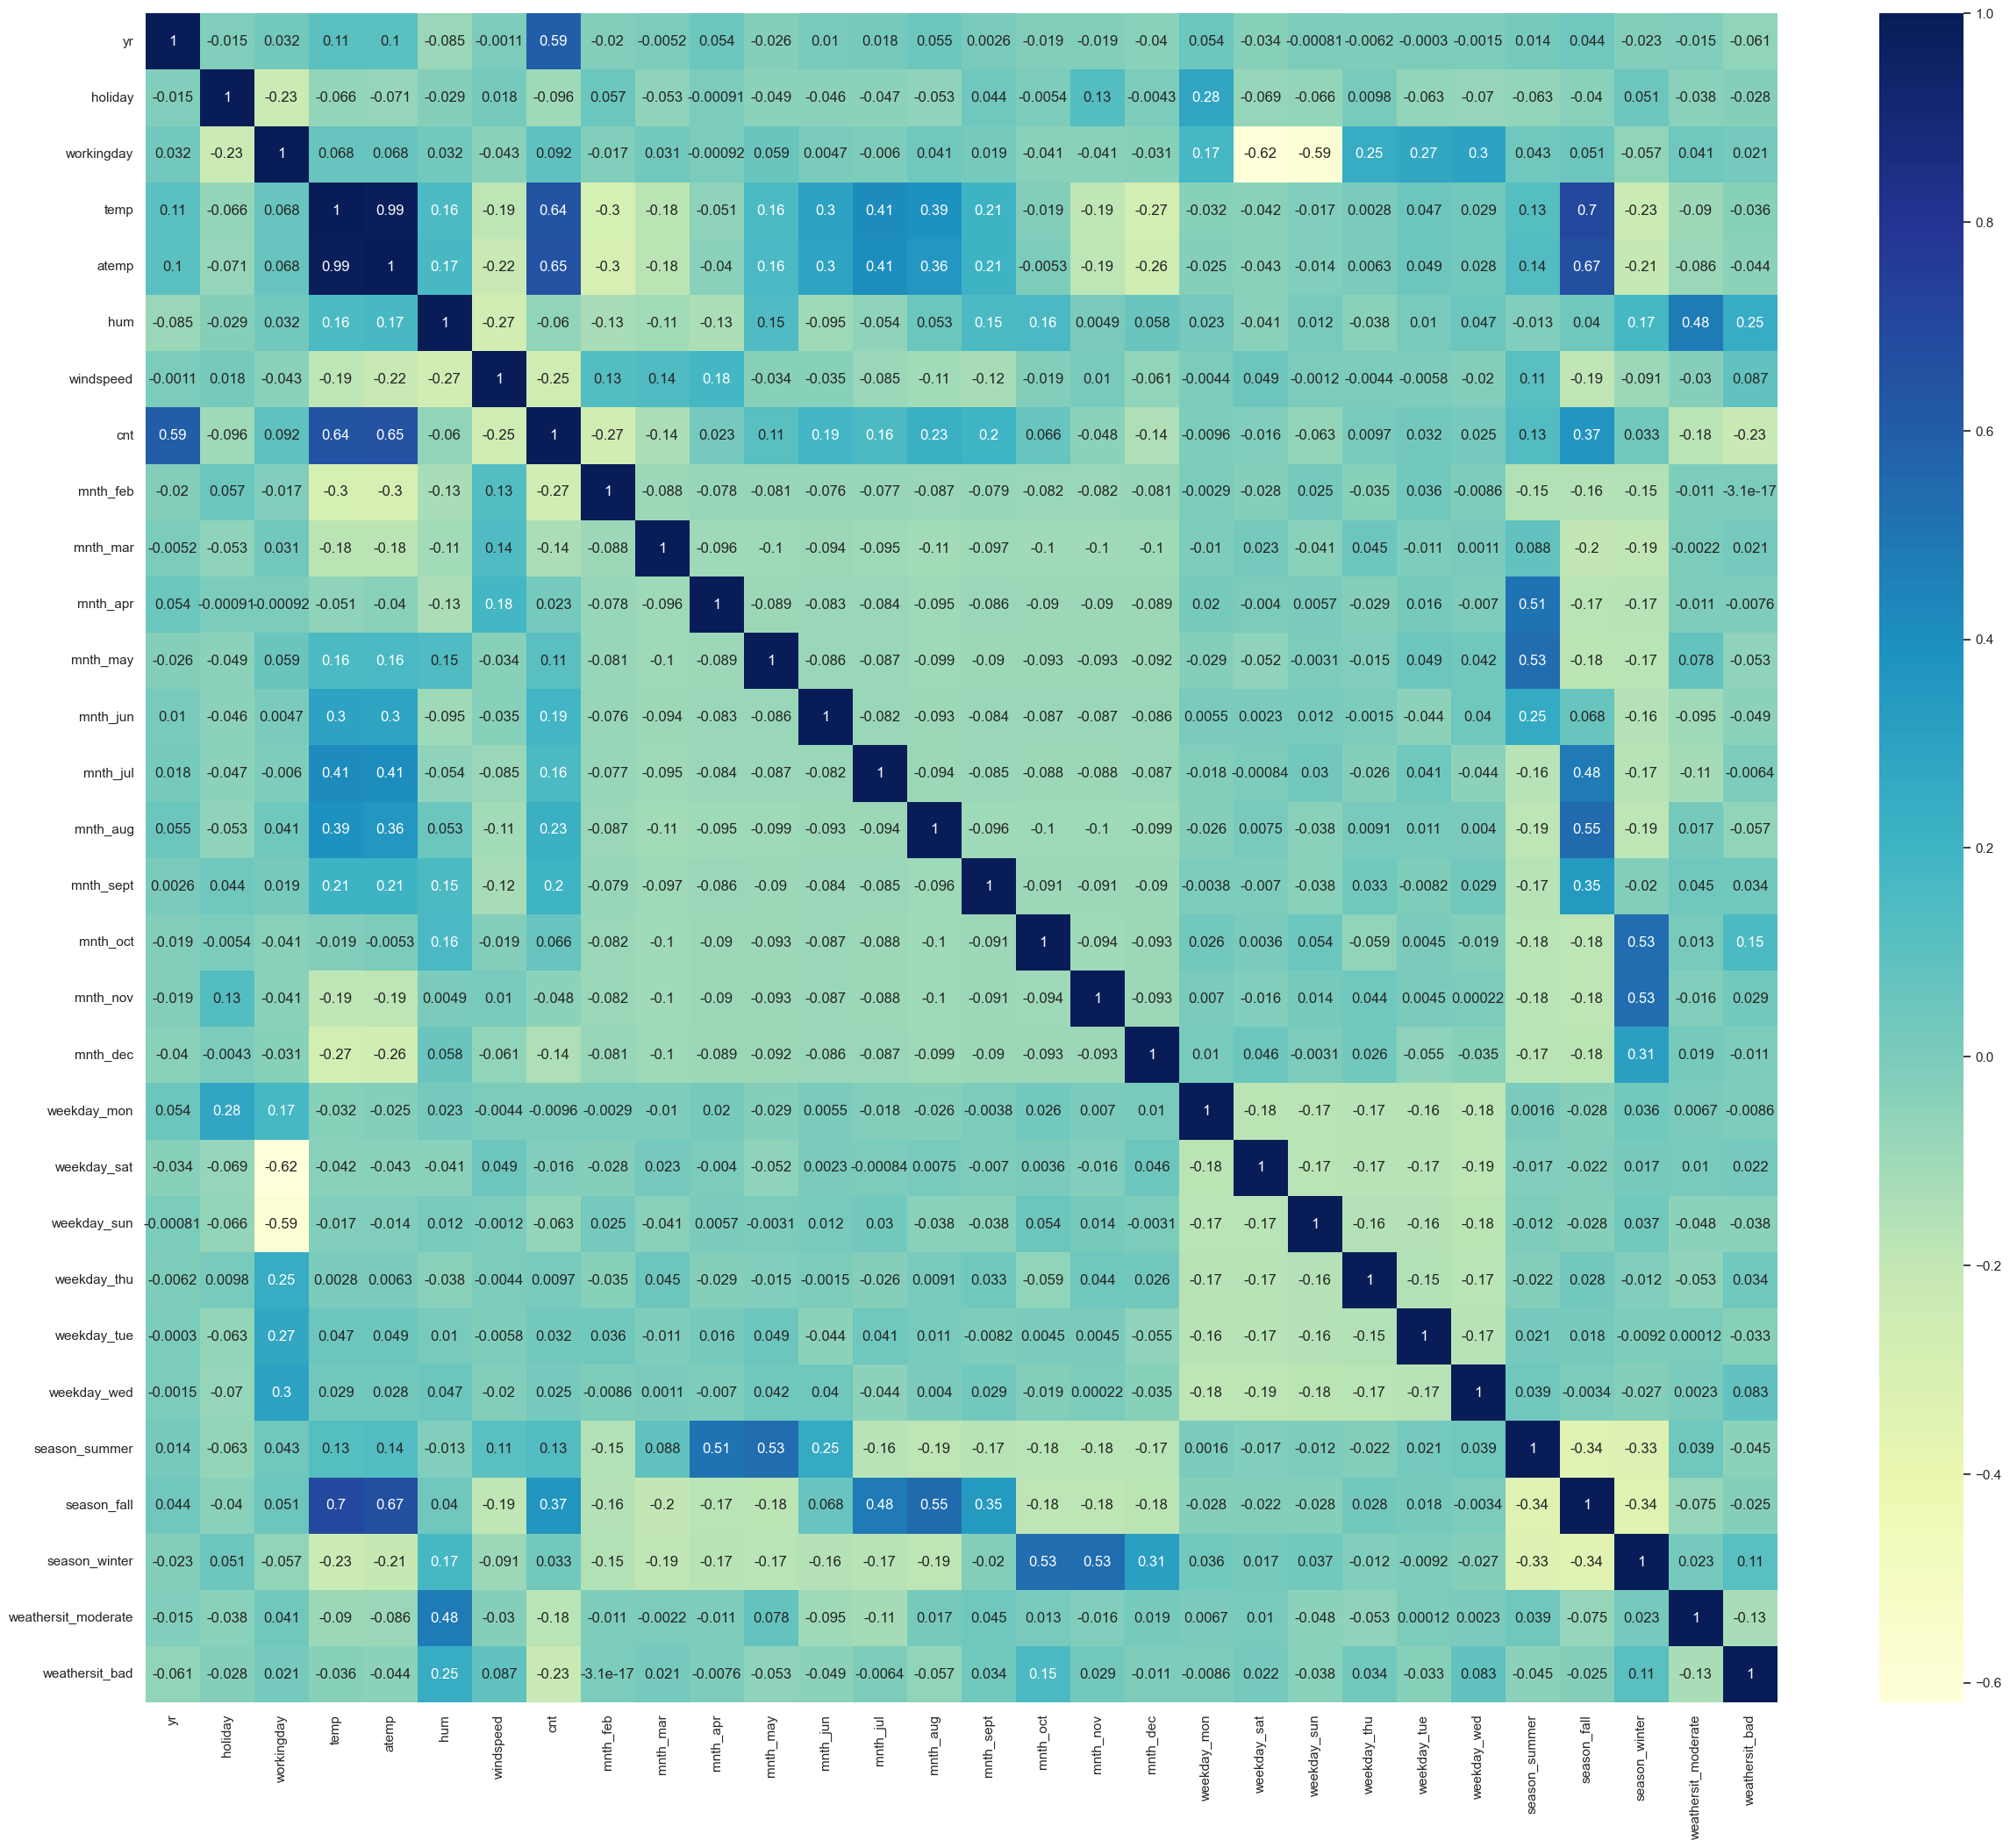

In [92]:
# Step: Plot a heatmap to check for correlations between all columns

# Set the figure size to ensure the heatmap is large enough for clear visualization
plt.figure(figsize=(30, 25))
sns.heatmap(df_train.corr(), annot=True, cmap="YlGnBu", annot_kws={"size": 12})  # Reduced font size for numbers
plt.show()

In [93]:
# Separating independent (features) and dependent (target) variables
# 'cnt' is the target variable we want to predict
y_train = df_train.pop('cnt')  # Removes 'cnt' from df_train and assigns it to y_train
y_test = df_test.pop('cnt')

# Remaining columns in df_train are the independent variables (features)
X_train = df_train  # Assigns the modified df_train to X_train
X_test = df_test

In [94]:
# Verify the shapes of both training and target sets

# Print the shape of the training DataFrame (df_train) after removing the target variable
print("Shape of df_train: ", df_train.shape)  # Should show (number_of_rows, number_of_columns)

# Print the shape of the independent variable set (X_train)
print("Shape of X_train: ", X_train.shape)  # Should match df_train shape as it is just a reference

# Print the shape of the dependent variable set (y_train)
print("Shape of y_train: ", y_train.shape)  # Should show (number_of_rows,)

print("Shape of df_test: ", df_test.shape)  # Should show (number_of_rows, number_of_columns)

# Print the shape of the independent variable set (X_train)
print("Shape of X_test: ", X_test.shape)  # Should match df_train shape as it is just a reference

# Print the shape of the dependent variable set (y_train)
print("Shape of y_test: ", y_test.shape)  # Should show (number_of_rows,)


# Observation:
# Shapes of the datasets should confirm that:
# - df_train and X_train have the same number of rows and columns (547 rows and 29 columns) - indicating dataframe
# - y_train has the same number of rows as df_train (547 rows) but only 1 column - indicating series

Shape of df_train:  (510, 29)
Shape of X_train:  (510, 29)
Shape of y_train:  (510,)
Shape of df_test:  (219, 29)
Shape of X_test:  (219, 29)
Shape of y_test:  (219,)


In [95]:
X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'mnth_feb', 'mnth_mar', 'mnth_apr', 'mnth_may', 'mnth_jun', 'mnth_jul',
       'mnth_aug', 'mnth_sept', 'mnth_oct', 'mnth_nov', 'mnth_dec',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'season_summer', 'season_fall',
       'season_winter', 'weathersit_moderate', 'weathersit_bad'],
      dtype='object')

## 4. Build a model:

### Model - 1

In [98]:
# Step-1: Create Model-1 using Statsmodel

import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train) # Add Constant
first_lr = sm.OLS(y_train, X_train_sm) # Create first model
first_lr_model = first_lr.fit() #Fitting the model
first_lr_model.params # Checking all parameters

const                  0.156320
yr                     0.232208
holiday               -0.011540
workingday             0.074733
temp                   0.401322
atemp                  0.050628
hum                   -0.151812
windspeed             -0.184388
mnth_feb               0.030389
mnth_mar               0.063853
mnth_apr               0.062565
mnth_may               0.087257
mnth_jun               0.060862
mnth_jul               0.023289
mnth_aug               0.078641
mnth_sept              0.144371
mnth_oct               0.070260
mnth_nov               0.020783
mnth_dec               0.016994
weekday_mon           -0.021502
weekday_sat            0.073830
weekday_sun            0.019298
weekday_thu           -0.009750
weekday_tue           -0.019308
weekday_wed           -0.005733
season_summer          0.086796
season_fall            0.048580
season_winter          0.153968
weathersit_moderate   -0.061030
weathersit_bad        -0.256697
dtype: float64

In [99]:
# Check all OLS Regression results like - P-Values, F-Statistic, R-Squared and other details

first_lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     99.96
Date:                Tue, 29 Oct 2024   Prob (F-statistic):          8.42e-181
Time:                        13:51:59   Log-Likelihood:                 528.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     481   BIC:                            -875.3
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1563      0.023      6.668      0.000       0.110       0.202
yr                      0.2322      0.008     28.792      0.000       0.216       0.248
holiday                -0.0115      0.023     -0.505      0.614      -0.056       0.033
workingday              0.0747      0.011      7.009      0.000       0.054       0.096
temp                    0.4013      0.142      2.821      0.005       0.122       0.681
atemp                   0.0506      0.138      0.366      0.714      -0.221       0.322
hum                    -0.1518      0.039     -3.940      0.000      -0.228      -0.076
windspeed              -0.1844      0.026     -7.003      0.000      -0.236      -0.133
mnth_feb                0.0304      0.021      1.474      0.141      -0.010       0.071
mnth_mar                0.0639      0.022      2.857      0.004       0.020       0.108
mnth_apr                0.0626      0.034      1.864      0.063      -0.003       0.129
mnth_may                0.0873      0.036      2.412      0.016       0.016       0.158
mnth_jun                0.0609      0.039      1.556      0.120      -0.016       0.138
mnth_jul                0.0233      0.044      0.529      0.597      -0.063       0.110
mnth_aug                0.0786      0.042      1.873      0.062      -0.004       0.161
mnth_sept               0.1444      0.037      3.853      0.000       0.071       0.218
mnth_oct                0.0703      0.034      2.041      0.042       0.003       0.138
mnth_nov                0.0208      0.033      0.633      0.527      -0.044       0.085
mnth_dec                0.0170      0.027      0.641      0.522      -0.035       0.069
weekday_mon            -0.0215      0.015     -1.395      0.164      -0.052       0.009
weekday_sat             0.0738      0.012      6.120      0.000       0.050       0.098
weekday_sun             0.0193      0.013      1.527      0.128      -0.006       0.044
weekday_thu            -0.0097      0.016     -0.625      0.532      -0.040       0.021
weekday_tue            -0.0193      0.016     -1.242      0.215      -0.050       0.011
weekday_wed            -0.0057      0.015     -0.384      0.701      -0.035       0.024
season_summer           0.0868      0.024      3.679      0.000       0.040       0.133
season_fall             0.0486      0.030      1.618      0.106      -0.010       0.108
season_winter           0.1540      0.026      5.932      0.000       0.103       0.205
weathersit_moderate    -0.0610      0.010     -5.845      0.000      -0.082      -0.041
weathersit_bad         -0.2567      0.026     -9.712      0.000      -0.309      -0.205
==============================================================================
Omnibus:                       85.143   Durbin-Watson:                   2.041
Prob(Omnibus):       

### Key Observations from OLS Regression Results

#### Model Performance
- **R-squared: 0.856**: Explains 85.6% of variance in `cnt`, indicating a strong model fit.
- **Adjusted R-squared: 0.848**: Accounts for predictor count; slight drop from R-squared suggests no overfitting.
- **F-statistic: 110.2 (p < 0.05)**: Indicates that at least one predictor is significant.

#### Significant Predictors
- **Positive Impact**: 
  - **`temp`**: Increases in temperature (coef: 0.3916) lead to higher `cnt`.
- **Negative Impact**: 
  - **`windspeed`**: Higher windspeed (coef: -0.1773) reduces `cnt`.
  
#### Insignificant Predictors
- Variables like **`holiday`**, **`atemp`**, and various **`weekday`** indicators (except Saturday) show p-values > 0.05, indicating no significant contribution to the model.

#### Conclusion
- Overall, the model fits well but `may benefit from feature selection to improve accuracy and reduce complexity`.

### Model Refinement Strategy
With around `30 predictor variables`, manually eliminating insignificant ones is impractical.

#### Proposed Approach: Hybrid Method
- **Step 1: Recursive Feature Elimination (RFE)**
  - Automates the identification of significant features by removing less important ones based on model performance.
<br>
- **Step 2: Manual Review**
  - Conduct a final inspection of remaining variables, considering domain knowledge for retention decisions.

### Importing RFE and Linear Regression

To implement Recursive Feature Elimination (RFE) for feature selection, we need to import the necessary libraries and classes:

```python
# Importing RFE and Linear Regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [103]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(estimator=lm, n_features_to_select=15)  # Running RFE
rfe = rfe.fit(X_train, y_train)

# Output feature names, support status, and rankings
feature_selection_results = list(zip(X_train.columns, rfe.support_, rfe.ranking_))


### Notes:
- **`rfe.support_`**: A boolean array indicating whether each feature is selected.
- **`rfe.ranking_`**: An array indicating the rank of each feature, where rank 1 indicates the most important features.

In [105]:
feature_selection_results

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('mnth_feb', False, 7),
 ('mnth_mar', False, 2),
 ('mnth_apr', False, 4),
 ('mnth_may', False, 3),
 ('mnth_jun', False, 5),
 ('mnth_jul', False, 8),
 ('mnth_aug', True, 1),
 ('mnth_sept', True, 1),
 ('mnth_oct', True, 1),
 ('mnth_nov', False, 9),
 ('mnth_dec', False, 10),
 ('weekday_mon', False, 12),
 ('weekday_sat', True, 1),
 ('weekday_sun', False, 11),
 ('weekday_thu', False, 14),
 ('weekday_tue', False, 13),
 ('weekday_wed', False, 15),
 ('season_summer', True, 1),
 ('season_fall', True, 1),
 ('season_winter', True, 1),
 ('weathersit_moderate', True, 1),
 ('weathersit_bad', True, 1)]

In [106]:
# RFE support Variables

support_Col = X_train.columns[rfe.support_]
print(len(support_Col))
support_Col

15


Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'mnth_aug',
       'mnth_sept', 'mnth_oct', 'weekday_sat', 'season_summer', 'season_fall',
       'season_winter', 'weathersit_moderate', 'weathersit_bad'],
      dtype='object')

In [107]:
# RFE not Supported Variables

unsupport_Col = X_train.columns[~rfe.support_]
print(len(unsupport_Col))
unsupport_Col

14


Index(['atemp', 'mnth_feb', 'mnth_mar', 'mnth_apr', 'mnth_may', 'mnth_jun',
       'mnth_jul', 'mnth_nov', 'mnth_dec', 'weekday_mon', 'weekday_sun',
       'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

In [108]:
# Lets consider only  the RFE supported columns for model building

X_train_rfe = X_train[support_Col]

#### Features Eliminated by Recursive Feature Elimination Process are:

- **atemp** (Ranking: 7)
- **mnth_feb** (Ranking: 8)
- **mnth_mar** (Ranking: 2)
- **mnth_apr** (Ranking: 5)
- **mnth_may** (Ranking: 3)
- **mnth_jun** (Ranking: 4)
- **mnth_jul** (Ranking: 9)
- **mnth_nov** (Ranking: 14)
- **mnth_dec** (Ranking: 15)
- **weekday_mon** (Ranking: 10)
- **weekday_sun** (Ranking: 6)
- **weekday_thu** (Ranking: 12)
- **weekday_tue** (Ranking: 11)
- **weekday_wed** (Ranking: 13)

In [110]:
# Verify the latest dataframe - X_train_rfe which will only have 15 columns that came from RFE Process

X_train_rfe.head()

yr  holiday  workingday      temp       hum  windspeed  mnth_aug  \
653   1        0           1  0.509887  0.575354   0.300794         0   
576   1        0           1  0.815169  0.725633   0.264686         0   
426   1        0           0  0.442393  0.640189   0.255342         0   
728   1        0           0  0.245101  0.498067   0.663106         0   
482   1        0           0  0.395666  0.504508   0.188475         0   

     mnth_sept  mnth_oct  weekday_sat  season_summer  season_fall  \
653          0         1            0              0            0   
576          0         0            0              0            1   
426          0         0            1              0            0   
728          0         0            0              0            0   
482          0         0            1              1            0   

     season_winter  weathersit_moderate  weathersit_bad  
653              1                    0               0  
576              0                    0               0  
426              0                    1               0  
728              0                    0               0  
482              0                    1               0

In [111]:
# Subset the features selected by rfe1
col1 = X_train.columns[rfe.support_]

# Subsetting training data for 15 selected columns
X_train_rfe1 = X_train[col1]
X_test_rfe1 = X_test[col1]

# Add a constant to the model
X_train_rfe1 = sm.add_constant(X_train_rfe1)
X_test_rfe1 = sm.add_constant(X_test_rfe1)

print(X_train_rfe1.head())
print(X_test_rfe1.head())

     const  yr  holiday  workingday      temp       hum  windspeed  mnth_aug  \
653    1.0   1        0           1  0.509887  0.575354   0.300794         0   
576    1.0   1        0           1  0.815169  0.725633   0.264686         0   
426    1.0   1        0           0  0.442393  0.640189   0.255342         0   
728    1.0   1        0           0  0.245101  0.498067   0.663106         0   
482    1.0   1        0           0  0.395666  0.504508   0.188475         0   

     mnth_sept  mnth_oct  weekday_sat  season_summer  season_fall  \
653          0         1            0              0            0   
576          0         0            0              0            1   
426          0         0            1              0            0   
728          0         0            0              0            0   
482          0         0            1              1            0   

     season_winter  weathersit_moderate  weathersit_bad  
653              1                    0       

### Model - 2

In [113]:
# Fitting the model with 15 variables
lm1 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.7
Date:                Tue, 29 Oct 2024   Prob (F-statistic):          1.89e-191
Time:                        13:52:00   Log-Likelihood:                 520.09
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1950    

#### Model Performance Comparison

The new model built using selected features shows only a slight decrease in accuracy compared to the model built with all features:

- **Accuracy with all features:** 85.6%
- **Accuracy with selected features:** 85.2%

This minimal drop in accuracy (0.4%) is a good indication that the selected features are indeed effective and suitable for the mode#l.

### Next Steps: Check for Multicollinearity

Before finalizing the model, we should assess multicollinearity among the selected variables. This will help ensure that the features are not highly correlated, which can affect the model's interpretability and prformance.


In [115]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to Calculate Variance Inflation Factor (VIF)
# This function identifies multicollinearity in predictor variables 
# by calculating the VIF for each feature in a given DataFrame.

def calculateVIF(df):
    """
    Calculate Variance Inflation Factor (VIF) for each feature in the DataFrame.
    
    Parameters:
    df (DataFrame): DataFrame containing the predictor variables.
    
    Returns:
    DataFrame: A DataFrame with features and their corresponding VIF values, sorted in descending order.
    """
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [116]:
# Assuming df_train contains your predictor variables

vif_results = calculateVIF(X_train_rfe1)
print(vif_results)

               Features    VIF
0                 const  53.48
12          season_fall   6.04
4                  temp   3.71
11        season_summer   2.60
13        season_winter   2.17
5                   hum   1.91
3            workingday   1.88
10          weekday_sat   1.79
7              mnth_aug   1.68
14  weathersit_moderate   1.58
9              mnth_oct   1.52
8             mnth_sept   1.40
15       weathersit_bad   1.26
6             windspeed   1.20
2               holiday   1.16
1                    yr   1.04


#### VIF of season_fall = 6.04, p-Value of season_fall = 0.179, which is Greater than 0.05.

In [118]:
# Dropping "season_fall" column from Train & Test sets

X_train_rfe1.drop('season_fall',axis=1,inplace=True)
X_test_rfe1.drop('season_fall',axis=1,inplace=True)

In [119]:
# Verify the Shape of the dataframe again

print(X_train_rfe1.shape)
print(X_test_rfe1.shape)

(510, 15)
(219, 15)


### Model - 3

In [121]:
# Re-iterate the same process with filtered columns

lm1 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     197.5
Date:                Tue, 29 Oct 2024   Prob (F-statistic):          3.24e-192
Time:                        13:52:01   Log-Likelihood:                 519.16
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     495   BIC:                            -944.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1945    

#### Observation: 
- R-Squared and Adjusted R-Squared Values from this model (0.848, 0.844) are not deviating much from previous model (0.849, 0.844)

In [123]:
# Assuming df_train contains your predictor variables

vif_results = calculateVIF(X_train_rfe1)
print(vif_results)

               Features    VIF
0                 const  53.47
3            workingday   1.88
5                   hum   1.88
10          weekday_sat   1.79
12        season_winter   1.72
4                  temp   1.59
13  weathersit_moderate   1.57
9              mnth_oct   1.49
7              mnth_aug   1.46
11        season_summer   1.38
14       weathersit_bad   1.25
8             mnth_sept   1.24
6             windspeed   1.19
2               holiday   1.16
1                    yr   1.03


#### Though p-value for "hum" is 0, To verify the model behaviour, we are dropping "hum" With VIF = 1.88

In [125]:
# Dropping "hum" column from Train & Test sets

X_train_rfe1.drop('hum',axis=1,inplace=True)
X_test_rfe1.drop('hum',axis=1,inplace=True)

In [126]:
# Verify the Shape of the dataframe again

print(X_train_rfe1.shape)
print(X_test_rfe1.shape)

(510, 14)
(219, 14)


### Model - 4

In [128]:
# Re-iterate the same process with filtered columns

lm1 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     202.9
Date:                Tue, 29 Oct 2024   Prob (F-statistic):          6.16e-189
Time:                        13:52:01   Log-Likelihood:                 508.57
No. Observations:                 510   AIC:                            -989.1
Df Residuals:                     496   BIC:                            -929.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0945    

#### Observation: 
- R-Squared and Adjusted R-Squared Values from this model (0.849, 0.844) are not deviating much from previous model (0.842, 0.838)

In [130]:
# Assuming df_train contains your predictor variables

vif_results = calculateVIF(X_train_rfe1)
print(vif_results)

               Features    VIF
0                 const  22.60
3            workingday   1.87
9           weekday_sat   1.77
11        season_winter   1.68
4                  temp   1.53
8              mnth_oct   1.49
6              mnth_aug   1.46
10        season_summer   1.38
7             mnth_sept   1.23
2               holiday   1.16
5             windspeed   1.09
13       weathersit_bad   1.07
12  weathersit_moderate   1.06
1                    yr   1.02


#### p-value for "holiday" is 0.048. To verify the model behaviour, we are dropping "holiday"

In [132]:
# Dropping "holiday" column from Train & Test sets

X_train_rfe1.drop('holiday',axis=1,inplace=True)
X_test_rfe1.drop('holiday',axis=1,inplace=True)

In [133]:
# Verify the Shape of the dataframe again

print(X_train_rfe1.shape)
print(X_test_rfe1.shape)

(510, 13)
(219, 13)


### Model - 5

In [135]:
# Re-iterate the same process with filtered columns

lm1 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     218.2
Date:                Tue, 29 Oct 2024   Prob (F-statistic):          2.86e-189
Time:                        13:52:02   Log-Likelihood:                 506.56
No. Observations:                 510   AIC:                            -987.1
Df Residuals:                     497   BIC:                            -932.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0856    

In [136]:
# Regression line equation after the model analysis is as below:

Y = ""
for idx, coef in enumerate (lm1.params):
    Y = Y +" + "+ str(lm1.params.index[idx]) +"*"+ str(round(coef,2))
Y= Y[3:]

print(f"Equation of Regression Line is\n\n= {Y}")

Equation of Regression Line is

= const*0.09 + yr*0.23 + workingday*0.06 + temp*0.51 + windspeed*-0.15 + mnth_aug*0.05 + mnth_sept*0.12 + mnth_oct*0.04 + weekday_sat*0.07 + season_summer*0.1 + season_winter*0.13 + weathersit_moderate*-0.08 + weathersit_bad*-0.29


#### Observation: 
- R-Squared and Adjusted R-Squared Values from this model (0.849, 0.844) are not deviating much from previous model (0.840, 0.837)

In [138]:
# Assuming df_train contains your predictor variables

vif_results = calculateVIF(X_train_rfe1)
print(vif_results)

               Features    VIF
0                 const  21.33
10        season_winter   1.68
2            workingday   1.65
8           weekday_sat   1.64
3                  temp   1.52
7              mnth_oct   1.49
5              mnth_aug   1.46
9         season_summer   1.37
6             mnth_sept   1.23
4             windspeed   1.09
12       weathersit_bad   1.07
11  weathersit_moderate   1.06
1                    yr   1.02


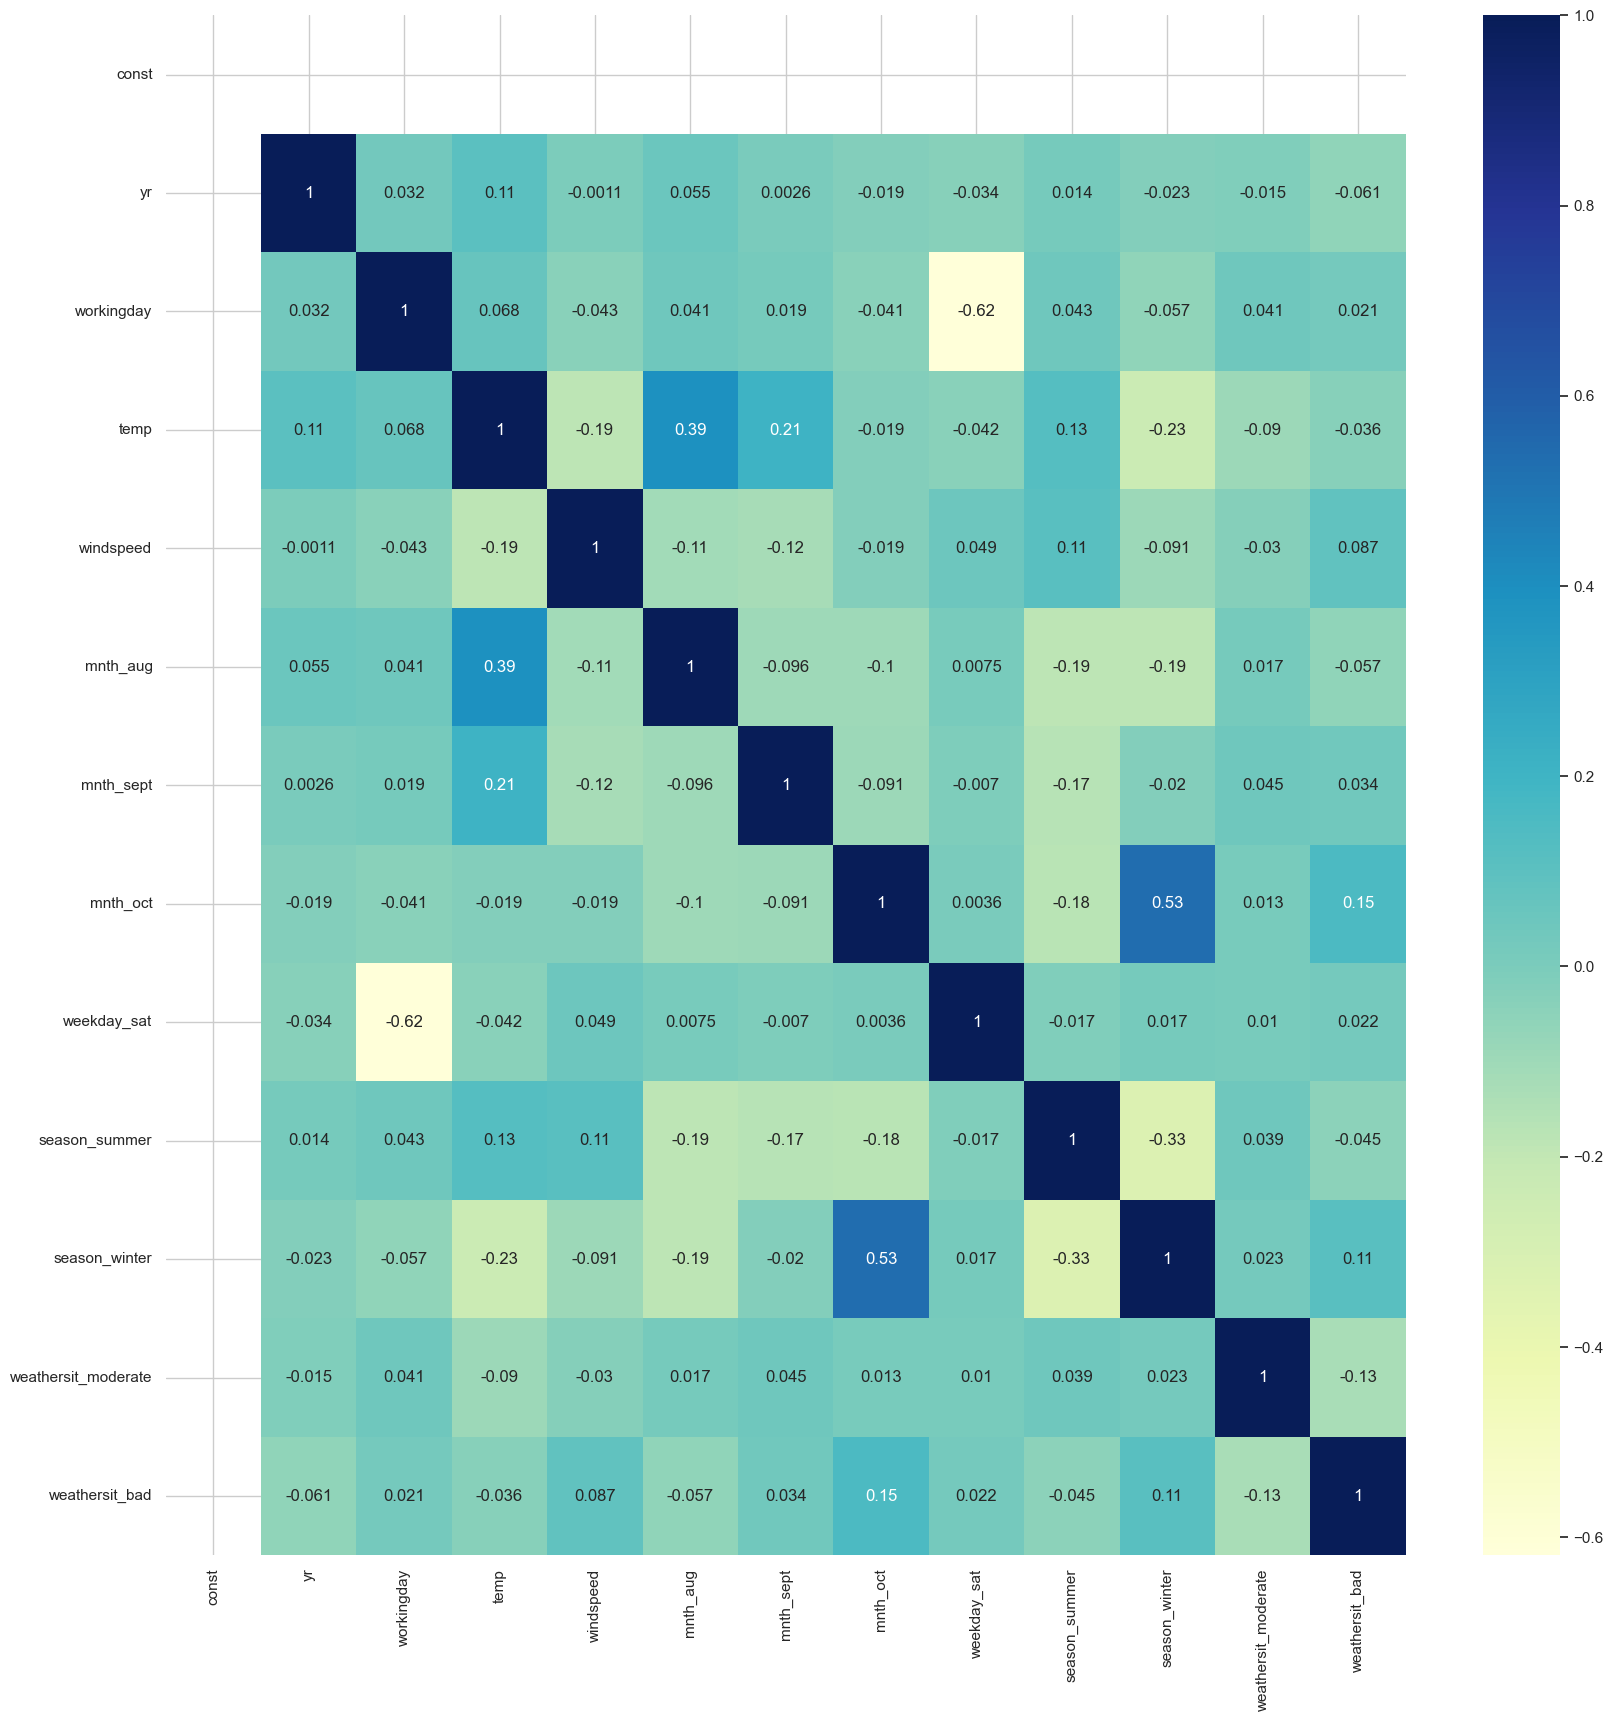

In [139]:
# Plotting Heatmap with the final predictor variables to check for Multi collinearity

plt.figure(figsize = (20, 20))
sns.heatmap(X_train_rfe1.corr(), cmap="YlGnBu", annot=True)
plt.show()

## Residual Analysis:

In [141]:
# Step-1: Predict y based on x, using our lr_model
y_train_pred = lm1.predict(X_train_rfe1)

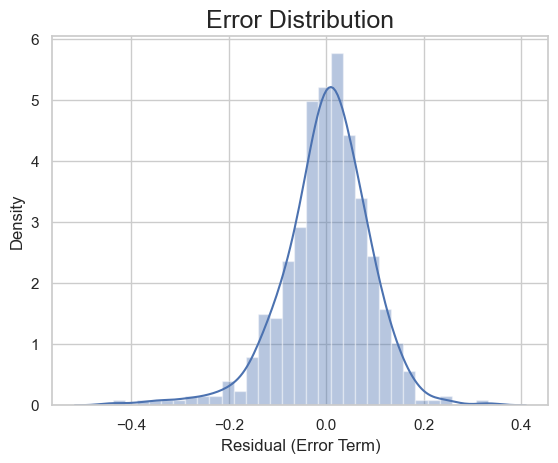

In [142]:
# Step-2: Check distribution plot to verify the distribution of residuals
res = y_train - y_train_pred
sns.distplot(res)
plt.xlabel('Residual (Error Term)', fontdict={'fontsize': 12})
plt.title('Error Distribution', fontdict={'fontsize': 18})
plt.show()

#### Inferences: 

- From the above graph it is evident that Error Distribution Is `Normally Distributed Across 0`, which indicates that our model has handled the assumption of Error Normal Distribution properly.


In [144]:
# Predict
y_test_pred = lm1.predict(X_test_rfe1)
y_test_pred

184    0.413182
535    0.913109
299    0.430945
221    0.594349
152    0.577837
         ...   
400    0.321174
702    0.722121
127    0.475494
640    0.827041
72     0.279347
Length: 219, dtype: float64

In [145]:
# Evaluate the model
# Step -1: Import class for r2_score
from sklearn.metrics import r2_score

# Step-2:
r2_score(y_true = y_test, y_pred = y_test_pred)

0.8024444386146303

### Residuals vs. Predicted Values

Analyzing the residuals is crucial for diagnosing the performance of our regression model. It helps us to:
- **Check for Homoscedasticity**: We want to see if the residuals are randomly scattered around the horizontal line (y=0). If they form a pattern, it suggests that the model's predictions are not consistent across all levels of the predicted values.
- **Identify Non-linearity**: If the residuals show a systematic pattern, it may indicate that the relationship between the independent and dependent variables is not adequately captured by the linear model.
- **Spot Outliers**: Large residuals can point to outliers in the data, which may need further investigation.

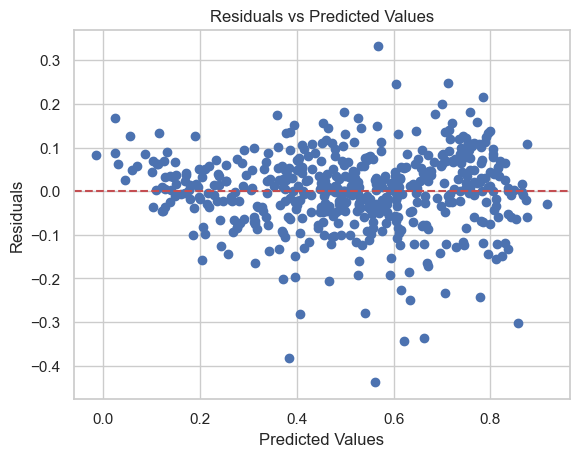

In [147]:
plt.scatter(y_train_pred, res)
plt.axhline(y=0, color='r', linestyle='--')  # Draw a horizontal line at y=0
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()

#### Homoscedasticity (Good): 
Residuals are evenly scattered, indicating consistent model performance across all predicted values.

#### From the above graph, we see that there is almost no relation between Residual & Predicted Value

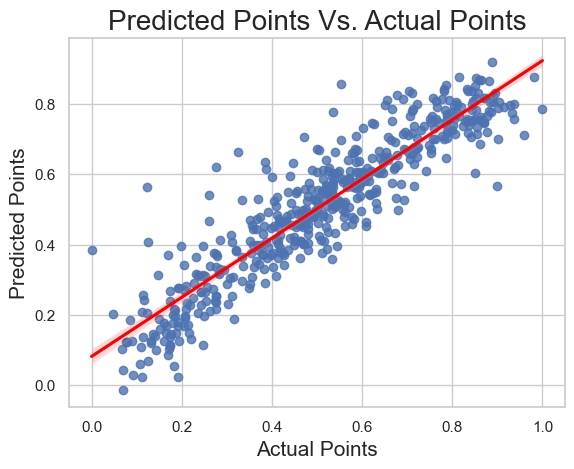

In [149]:
# Homoscedasticity

sns.regplot(x=y_train, y=y_train_pred, line_kws={'color': 'red'})
plt.title('Predicted Points Vs. Actual Points', fontdict={'fontsize': 20})
plt.xlabel('Actual Points', fontdict={'fontsize': 15})
plt.ylabel('Predicted Points', fontdict={'fontsize': 15})
plt.show()

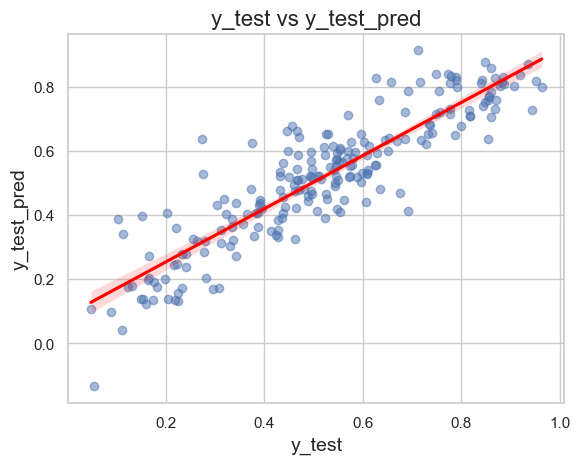

In [150]:
# Visualization of Actual vs. Predicted Bike Demand

sns.regplot(x=y_test, y=y_test_pred, line_kws={'color': 'red'}, scatter_kws={'alpha': 0.5})  # Set alpha for scatter points

# Adding titles and labels with custom font sizes
plt.title('y_test vs y_test_pred', fontsize=16)
plt.xlabel('y_test', fontsize=14)
plt.ylabel('y_test_pred', fontsize=14)

# Display the plot
plt.show()

### Durbin-Watson Test

In [151]:
import statsmodels.api as sm
import statsmodels.stats.stattools as stattools

# Calculate the Durbin-Watson statistic
dw_stat = stattools.durbin_watson(lm1.resid)

print("Durbin-Watson statistic:", dw_stat)

Durbin-Watson statistic: 2.031745578116921


The values of the Durbin-Watson statistic range from `0 to 4`, and the interpretation is as follows:

- **Value around 2**: Indicates no autocorrelation (ideal scenario).
- **Value < 1**: Suggests positive autocorrelation, meaning that residuals are positively correlated (a concern).
- **Value > 3**: Indicates negative autocorrelation, where residuals are negatively correlated (also a concern).

In general, a Durbin-Watson value between **1.5 and 2.5** is typically considered acceptable and suggests that there is no significant autocorrelation in the residuals. Values closer to **2** are preferred, indicating a more reliable model.

#### Observation:
As We have the Value of Durbin-Watson Statistic around 2, we can say that there is no autocorrelation.

### Plotting the QQ plot

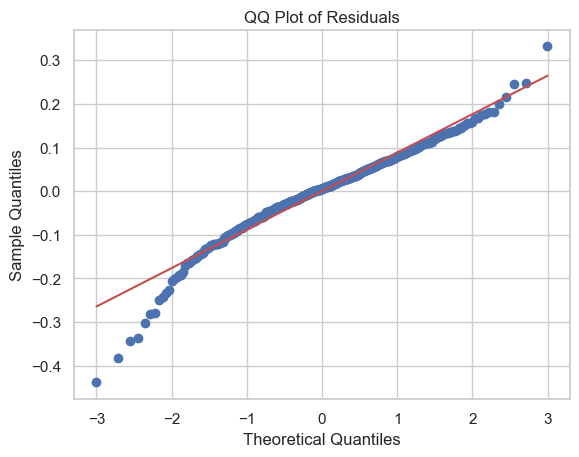

In [260]:
# A QQ plot is a scatterplot that compares two sets of quantiles against each other.
# If both sets of quantiles originate from the same distribution, the points will form a line that is approximately straight.

from scipy.stats import probplot

# Assuming 'res' is your residuals from the regression model
probplot(res, dist="norm", plot=plt)
plt.title('QQ Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

#### Line is almost a Straight Line

The points in the middle section roughly follow a straight line, suggesting that the residuals in this range are approximately normally distributed.

### Calculating RMSE (Root Mean Square Error)

In [264]:
from sklearn.metrics import mean_squared_error

# Calculate and print RMSE for the test set
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f"Test set RMSE = {test_rmse:.4f}")

# Calculate and print RMSE for the train set
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
print(f"Train set RMSE = {train_rmse:.4f}")

Test set RMSE = 0.0969
Train set RMSE = 0.0896


In [266]:
# Below are the coefficients and constant value

lm1.params

const                  0.085592
yr                     0.233075
workingday             0.055517
temp                   0.511556
windspeed             -0.154220
mnth_aug               0.054608
mnth_sept              0.117202
mnth_oct               0.038377
weekday_sat            0.066176
season_summer          0.101541
season_winter          0.126028
weathersit_moderate   -0.084925
weathersit_bad        -0.293233
dtype: float64

### Model Summary:

In [269]:
model_summary = pd.DataFrame({"Model Metrics":["R-Squared Value","RMSE"],
                         "Train Set":[0.840,0.0896],
                         "Test Set":[0.802,0.0969]})

In [271]:
model_summary

Model Metrics  Train Set  Test Set
0  R-Squared Value     0.8400    0.8020
1             RMSE     0.0896    0.0969

## Final R2 Comparison:

- R-Squared Value of Train Set is `0.840`
- R-Squared Value of Test Set is `0.802`

In [153]:
# Regression line equation after the model analysis is as below:

Y = ""
for idx, coef in enumerate (lm1.params):
    Y = Y +" + "+ str(lm1.params.index[idx]) +"*"+ str(round(coef,2))
Y= Y[3:]

print(f"Equation of Regression Line is \n\n= {Y}")

Equation of Regression Line is 

= const*0.09 + yr*0.23 + workingday*0.06 + temp*0.51 + windspeed*-0.15 + mnth_aug*0.05 + mnth_sept*0.12 + mnth_oct*0.04 + weekday_sat*0.07 + season_summer*0.1 + season_winter*0.13 + weathersit_moderate*-0.08 + weathersit_bad*-0.29


<h2 style="color: #4A90E2;">Conclusion and Inferences</h2>

<h3 style="color: #E94E77;">1. Model Performance:</h3>
<ul>
    <li>The R-Squared value for the train set is <strong>0.840</strong>, while for the test set, it is <strong>0.802</strong>.</li>
    <li>This indicates that approximately <strong>84%</strong> of the variance in the training data and <strong>80%</strong> of the variance in the test data can be explained by the model.</li>
    <li>The close values of R² between the train and test sets suggest that <u>the model generalizes well to unseen data without significant overfitting.</u></li>
</ul>

<h3 style="color: #E94E77;">2. Significant Features:</h3>
<ul>
    <li>The regression line equation provides a clear view of how various independent variables contribute to the demand for shared bikes.</li>
    <li>Each coefficient represents the change in the dependent variable (bike demand) for a one-unit increase in the corresponding feature, holding all other features constant.</li>
</ul>

<h3 style="color: #E94E77;">3. Interpretation of Coefficients:</h3>
<ul>
    <li><strong>Constant (0.09):</strong> This is the baseline demand when all other variables are zero.</li>
    <li><strong>Year (0.23):</strong> Each additional year increases bike demand by <strong>0.23</strong> units, indicating growing popularity or usage over time.</li>
    <li><strong>Working Day (0.06):</strong> Bike demand increases by <strong>0.06</strong> units on working days, highlighting the influence of weekday commuting.</li>
    <li><strong>Temperature (0.51):</strong> A rise in temperature by 1 degree leads to an increase in bike demand by <strong>0.51</strong> units, suggesting that warmer weather positively impacts bike usage.</li>
    <li><strong>Windspeed (-0.15):</strong> An increase in windspeed results in a decrease in demand by <strong>0.15</strong> units, indicating that adverse weather conditions negatively affect bike sharing.</li>
    <li><strong>Monthly and Seasonal Effects:</strong> The coefficients for months and seasons (e.g., <strong>mnth_aug, mnth_sept, season_summer</strong>) reflect variations in demand throughout the year, with summer months generally seeing higher demand, while bad weather conditions (as indicated by negative coefficients for <strong>weathersit</strong>) reduce demand.</li>
</ul>

<h3 style="color: #E94E77;">4. Business Implications:</h3>
<ul>
    <li>Increasing bike availability during warmer months or adjusting pricing strategies based on weather forecasts can help meet demand effectively.</li>
    <li>The model suggests that BoomBikes should consider the impact of external factors like weather conditions and time of year when planning for bike availability, promotions, or operational resources.</li>
</ul>

<h3 style="color: #E94E77;">5. Future Recommendations:</h3>
<ul>
    <li>Consider additional data or features that might further improve model accuracy, such as local events or festivals, holidays, and public transportation availability.</li>
    <li>Regularly update the model with new data to ensure it remains relevant and accurate in predicting bike demand.</li>
</ul>

<h3 style="color: #4A90E2;">Summary</h3>
<ul>
    <li>In summary, Our analysis has successfully identified the significant variables influencing bike demand and provided insights into how BoomBikes can leverage this information to enhance their business strategy. The findings underscore the importance of adapting to changing conditions and customer behavior to improve service delivery and revenue generation.</li>
</ul>